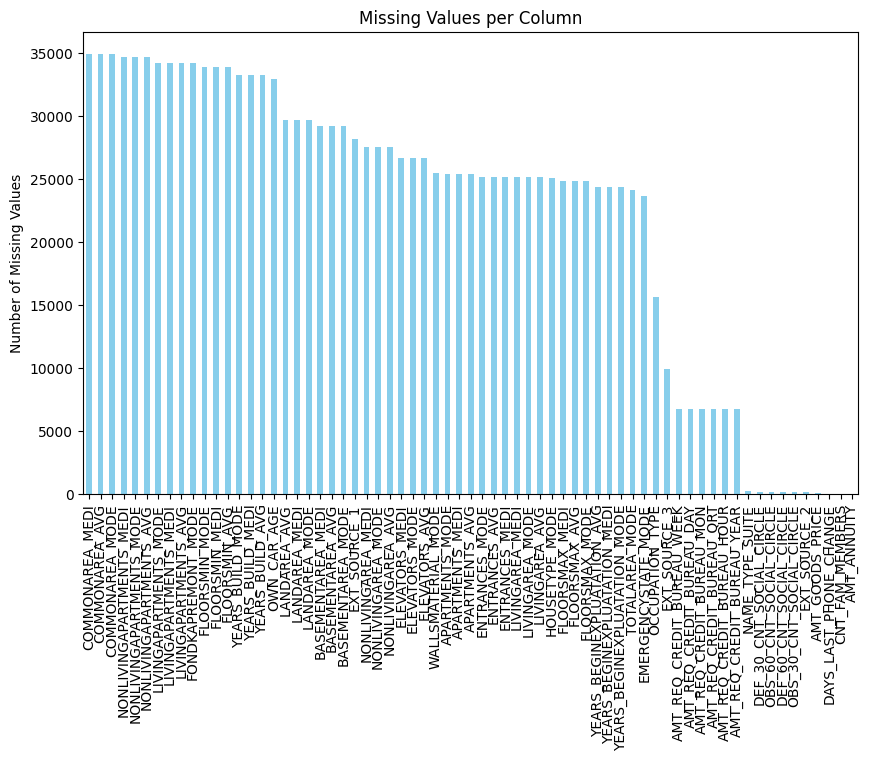

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
application_data = pd.read_csv('./application_data.csv')

# Task A1: Identify missing data
missing_data = application_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Visualize the proportion of missing values
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

# Task A2: Handle missing data
# Example: Impute missing values with median for numerical columns
# application_data.fillna(application_data.median(), inplace=True)


Percentage of outliers in each numerical column:
 SK_ID_CURR                     0.000000
TARGET                         8.052161
CNT_CHILDREN                   1.446029
AMT_INCOME_TOTAL               4.590092
AMT_CREDIT                     2.126043
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY      0.544011
AMT_REQ_CREDIT_BUREAU_WEEK     2.628053
AMT_REQ_CREDIT_BUREAU_MON     14.280286
AMT_REQ_CREDIT_BUREAU_QRT     16.268325
AMT_REQ_CREDIT_BUREAU_YEAR     1.104022
Length: 106, dtype: float64


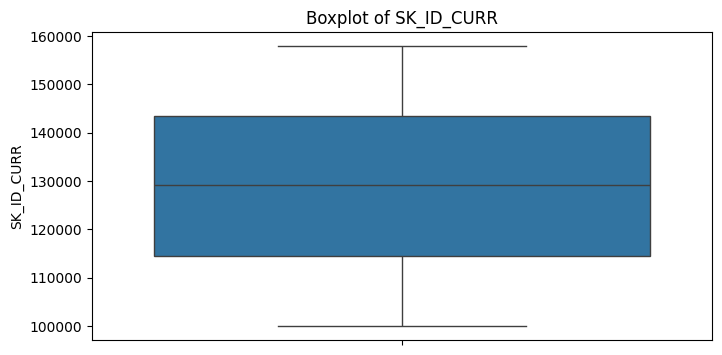

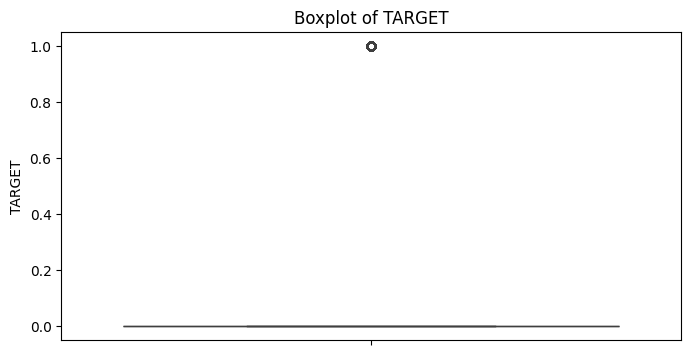

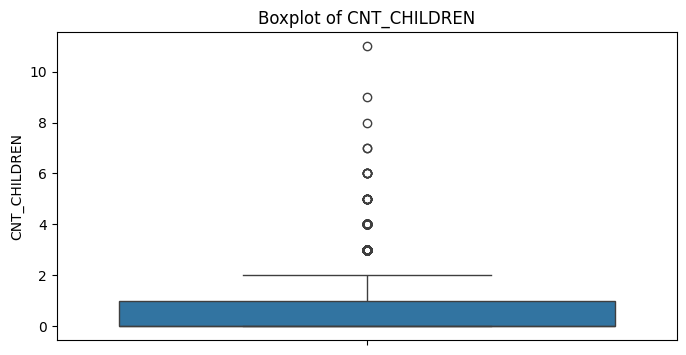

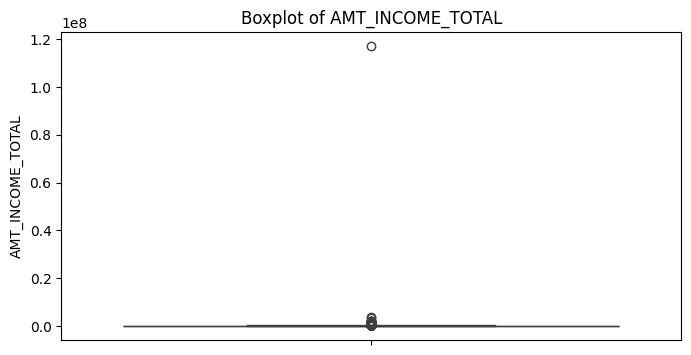

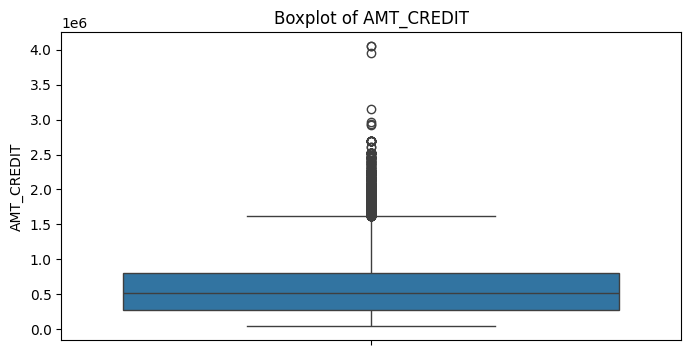

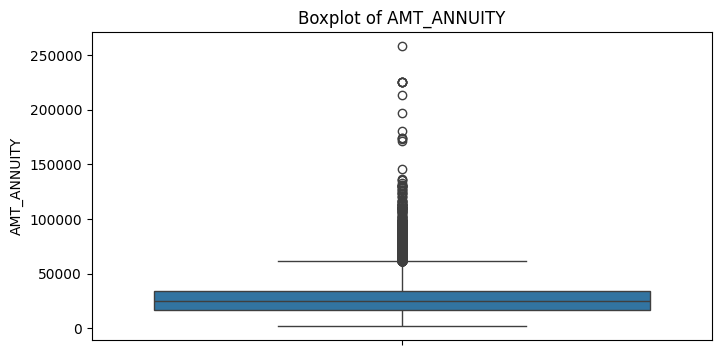

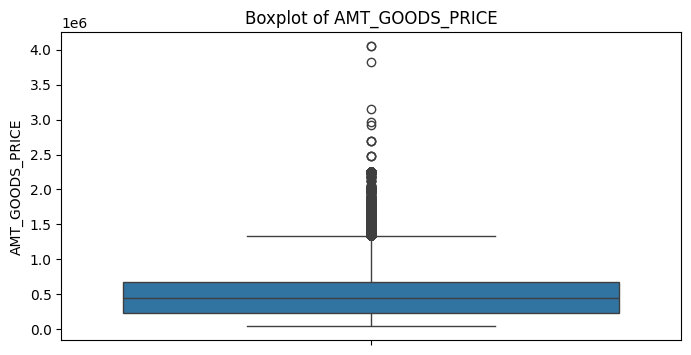

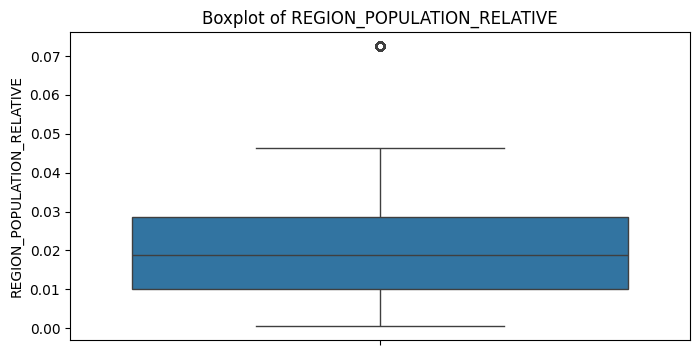

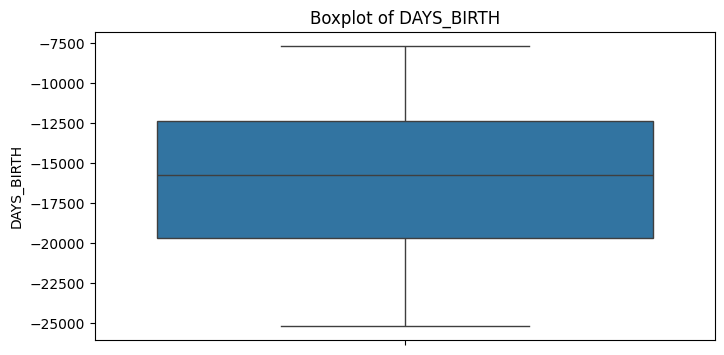

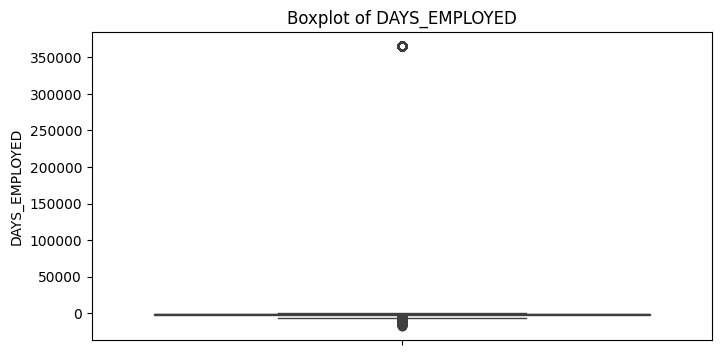

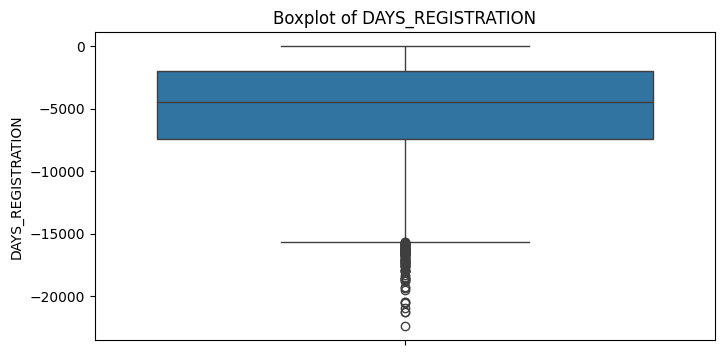

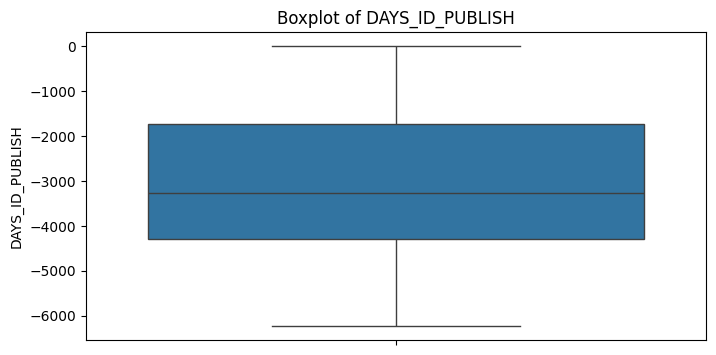

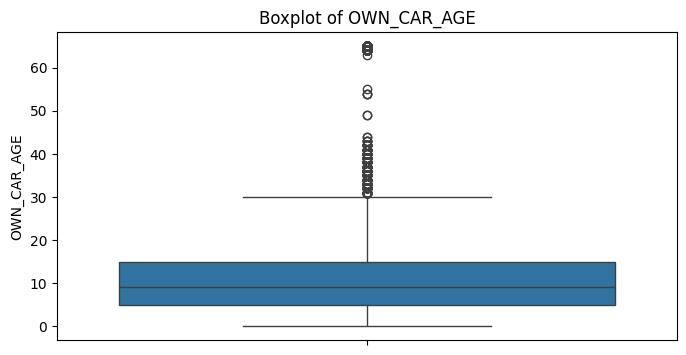

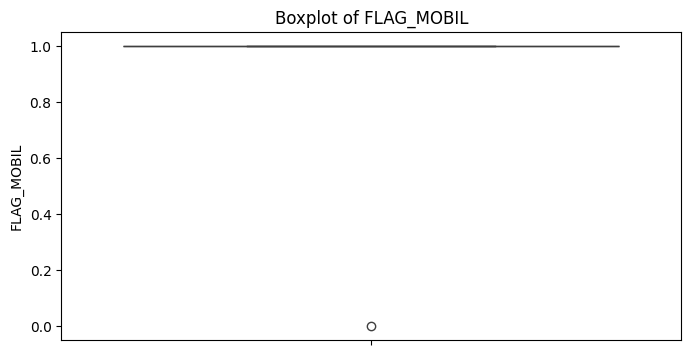

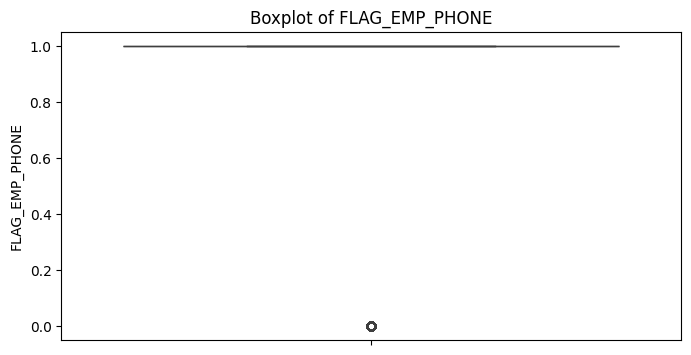

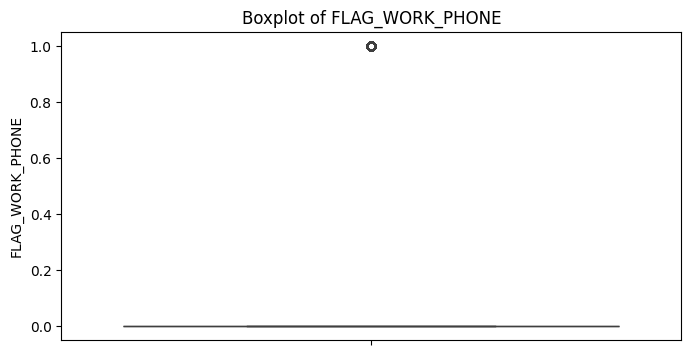

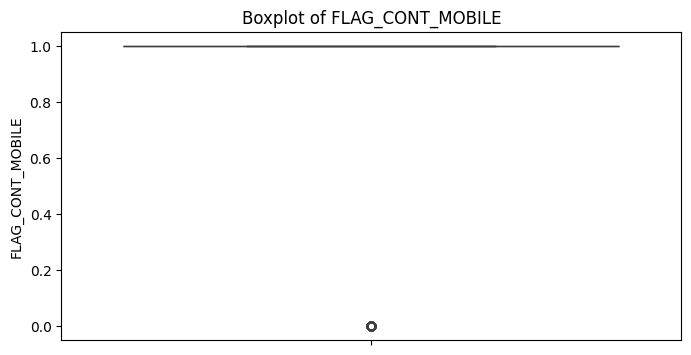

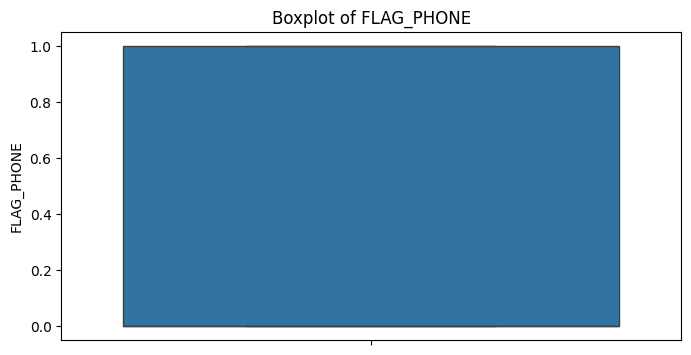

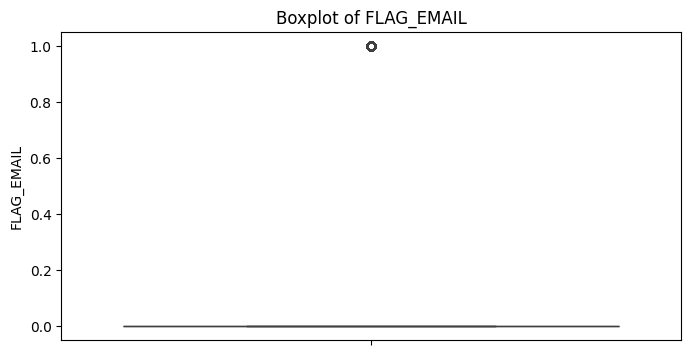

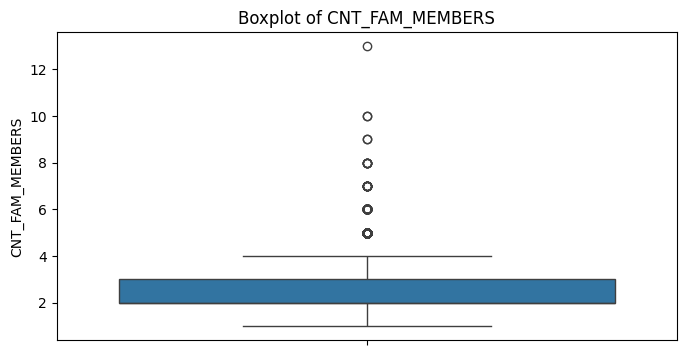

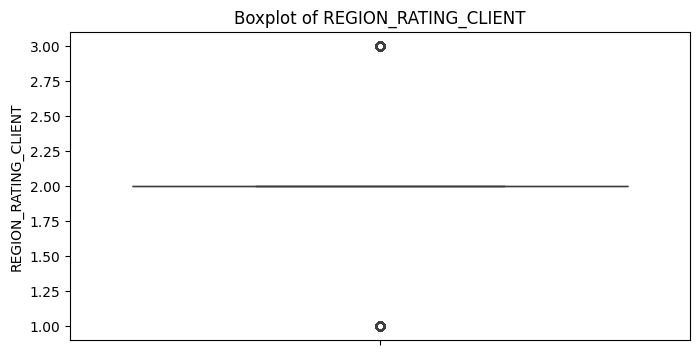

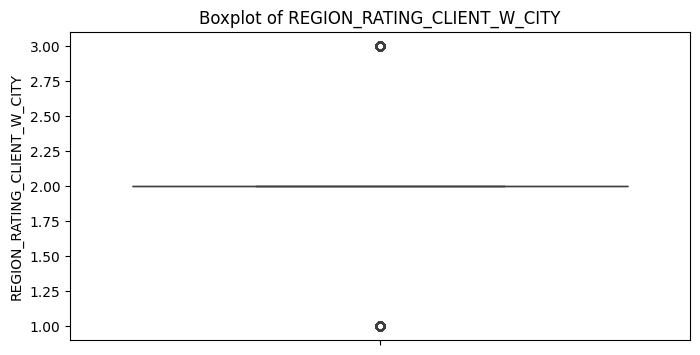

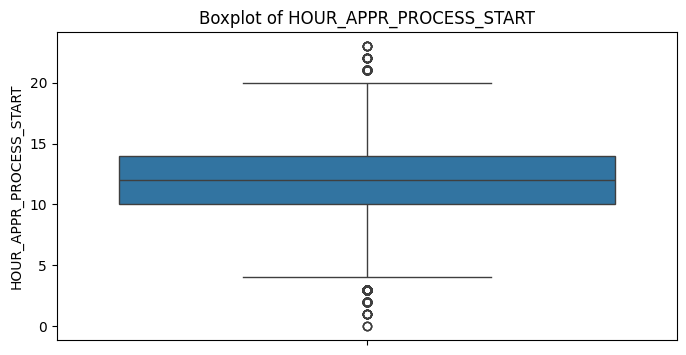

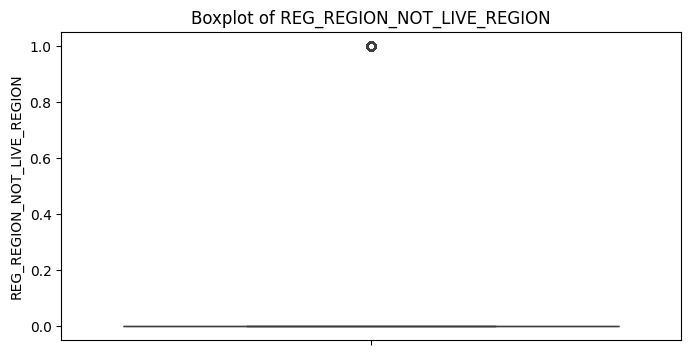

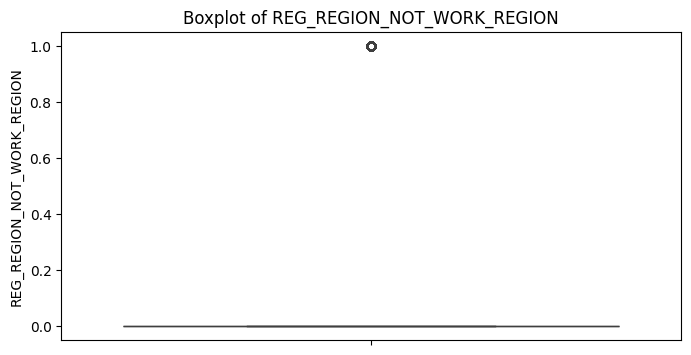

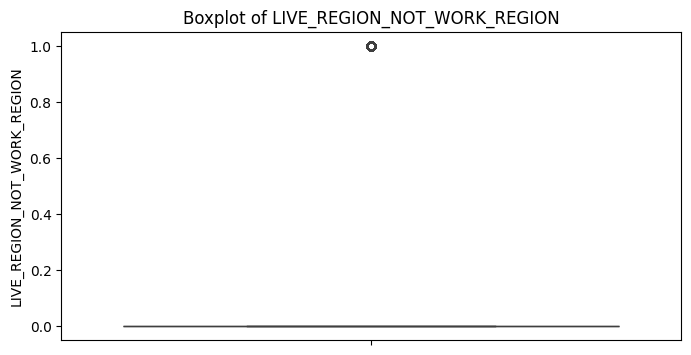

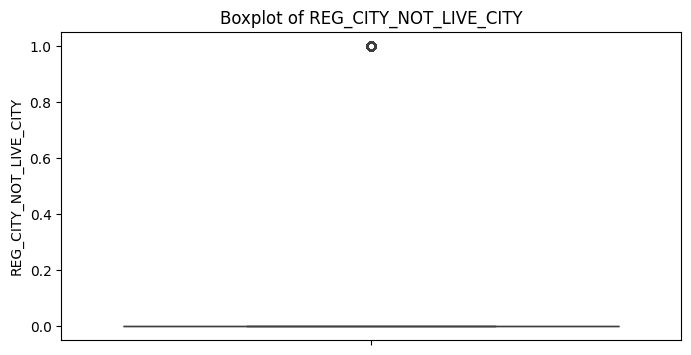

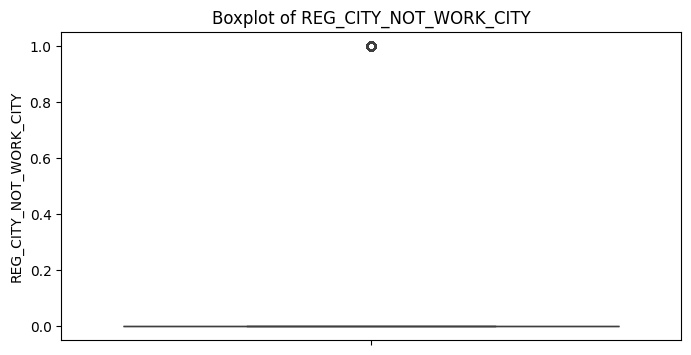

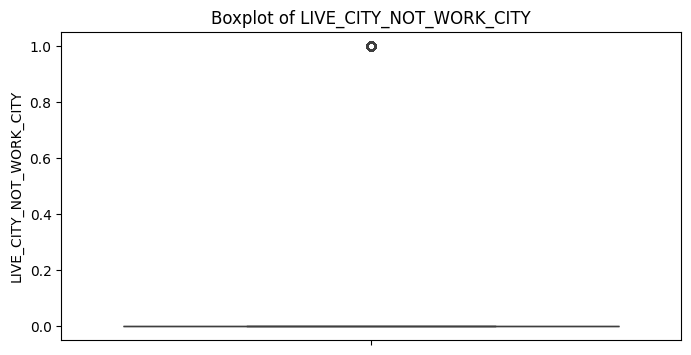

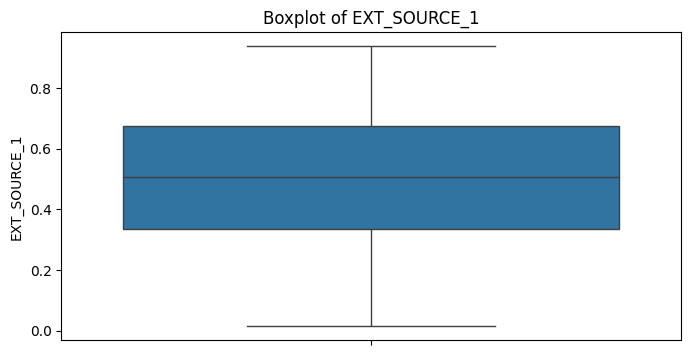

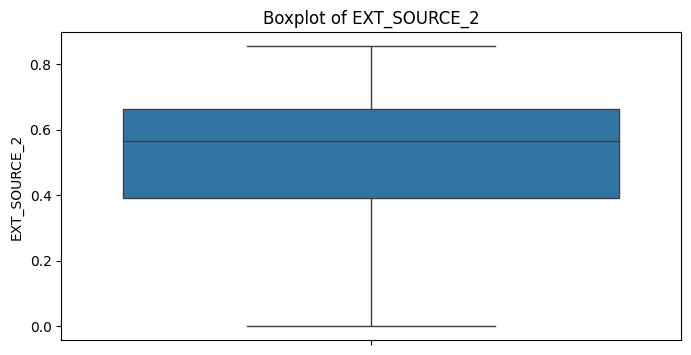

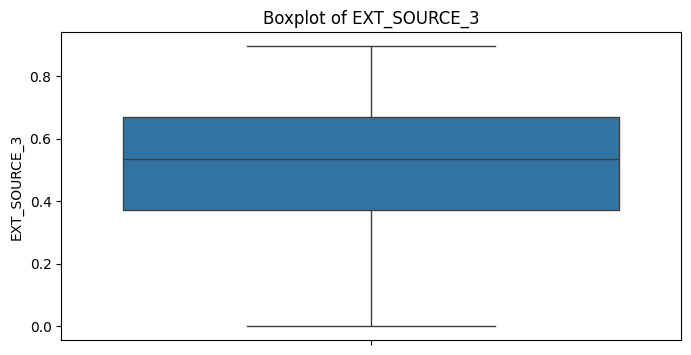

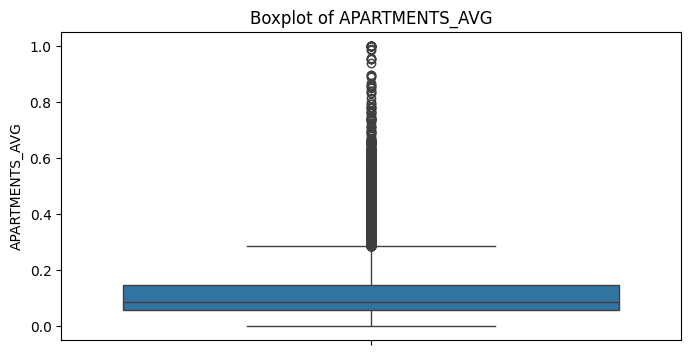

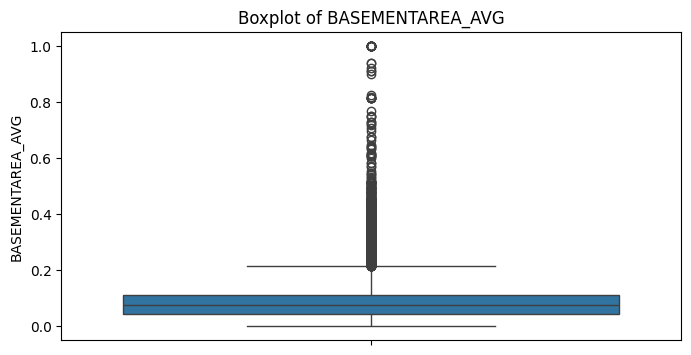

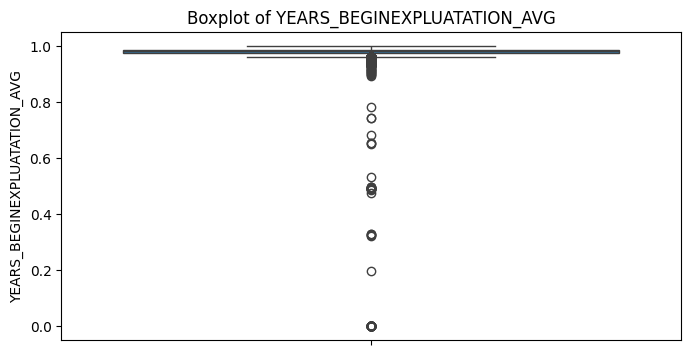

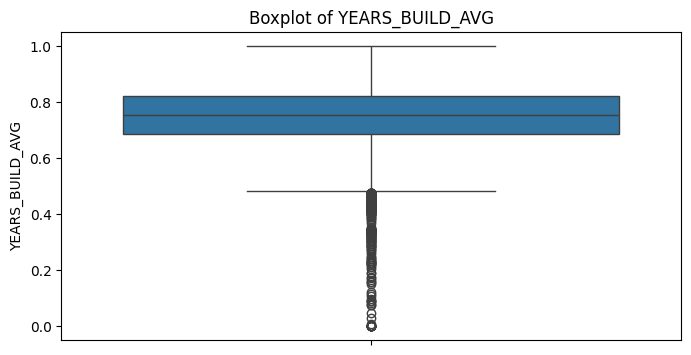

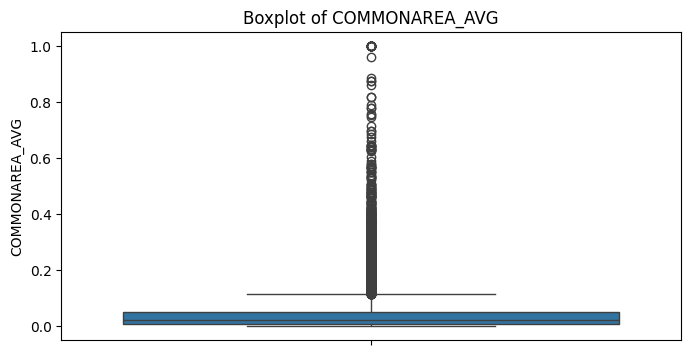

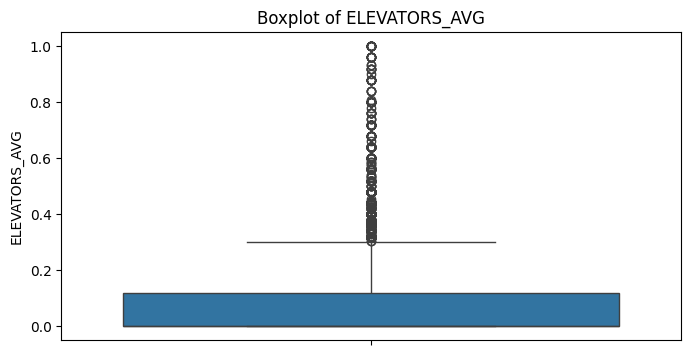

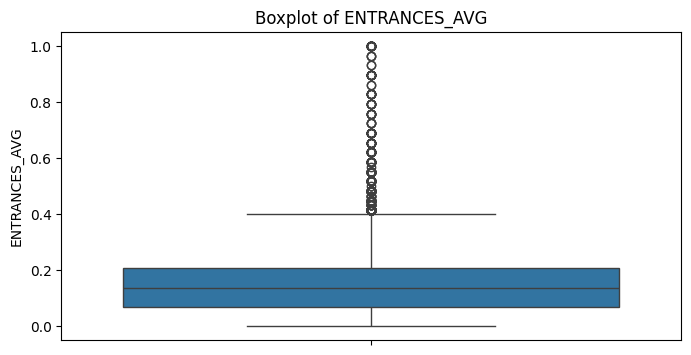

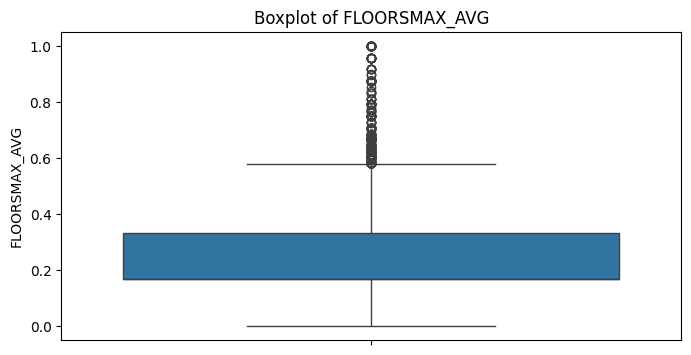

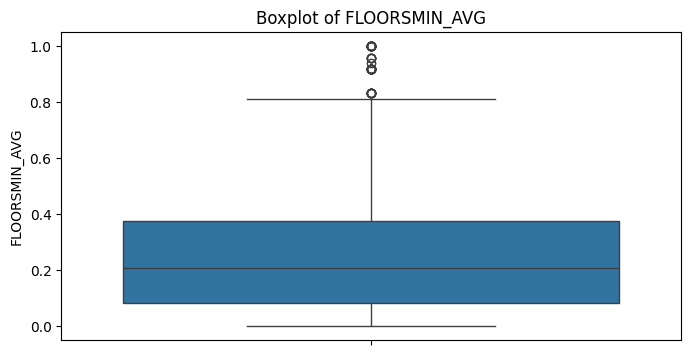

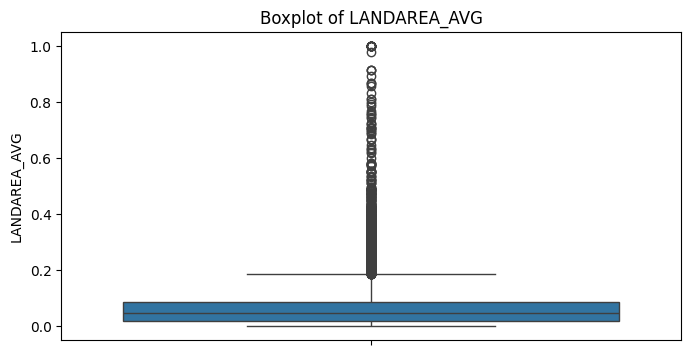

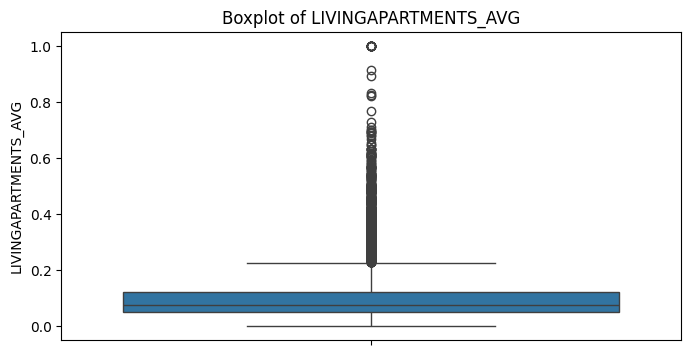

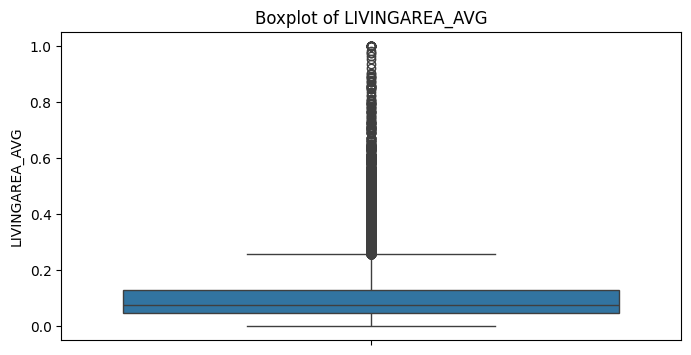

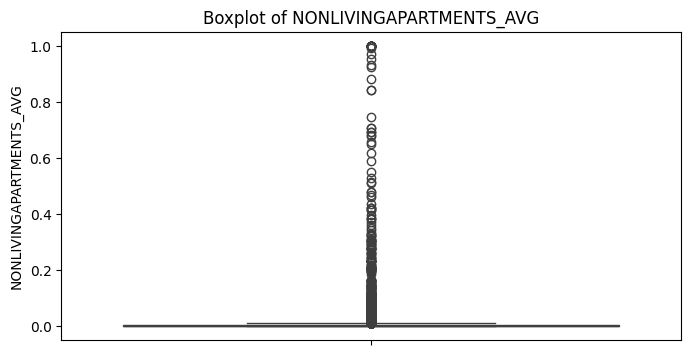

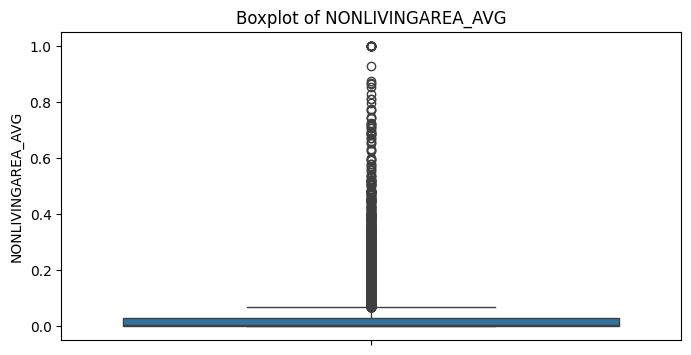

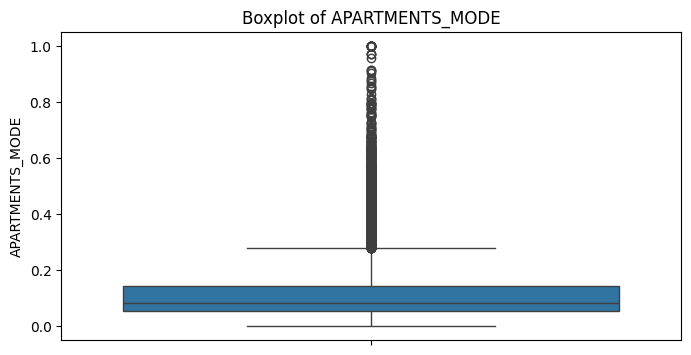

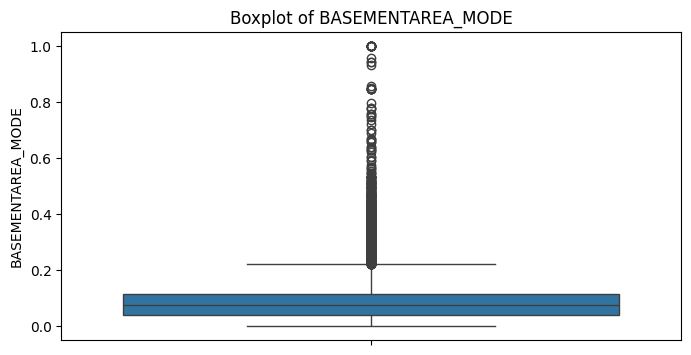

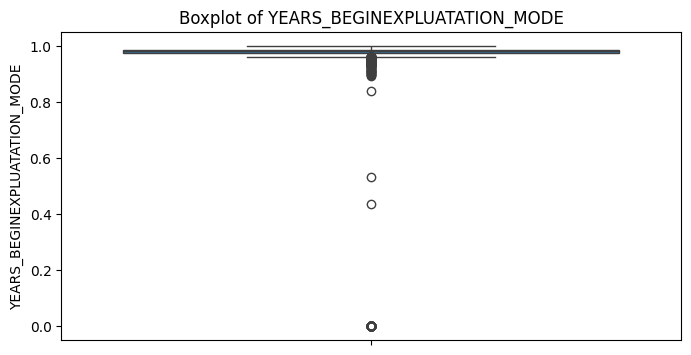

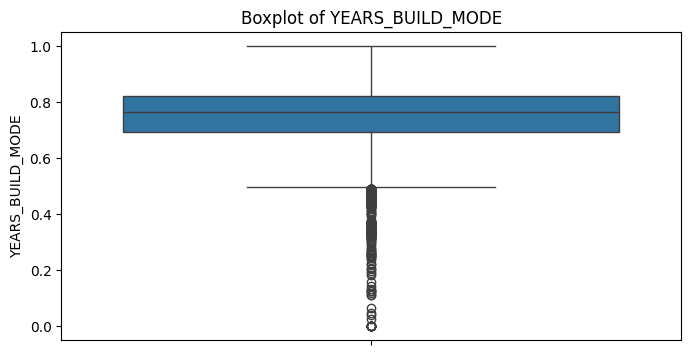

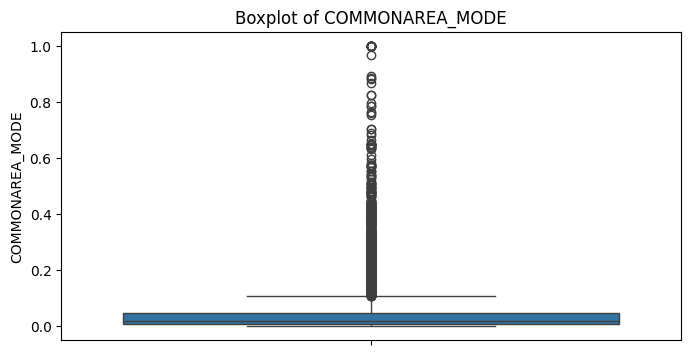

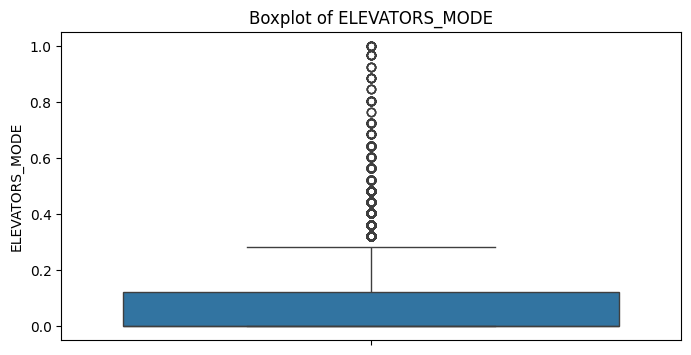

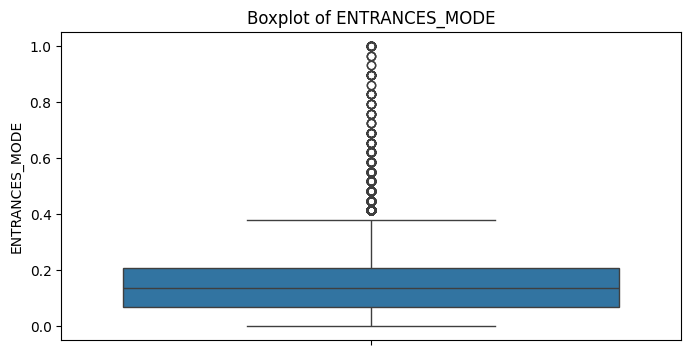

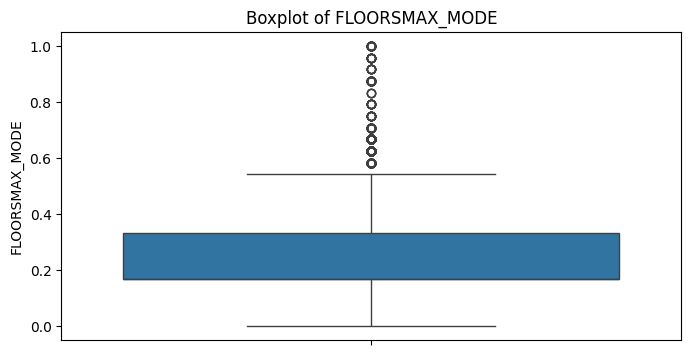

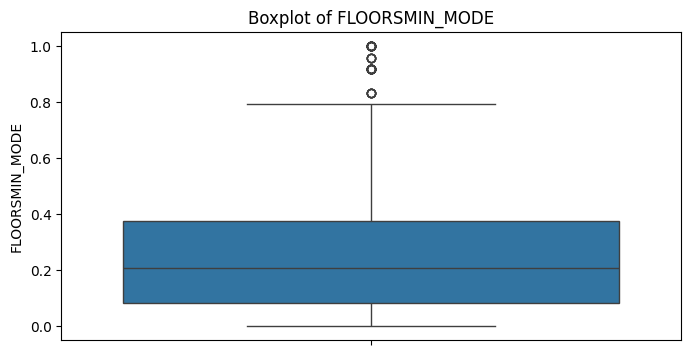

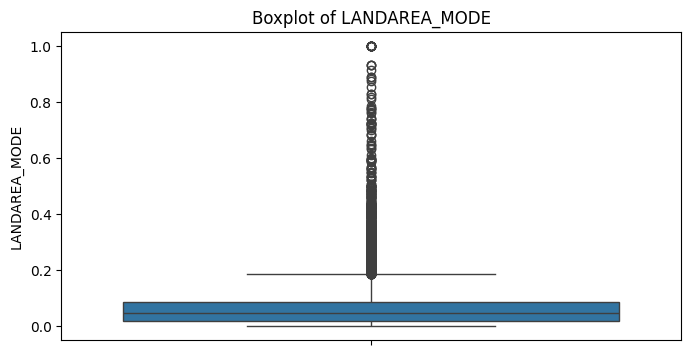

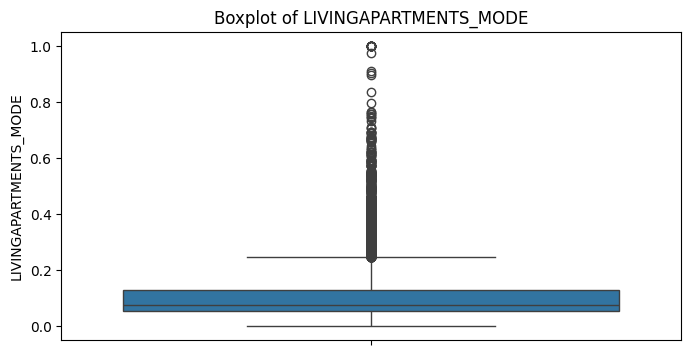

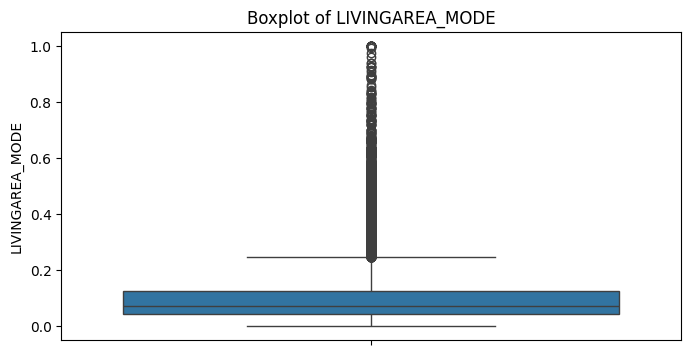

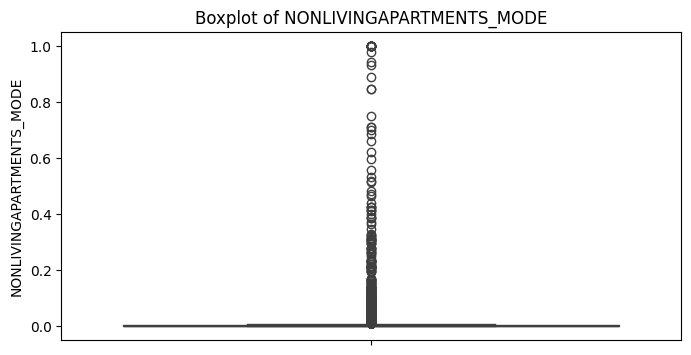

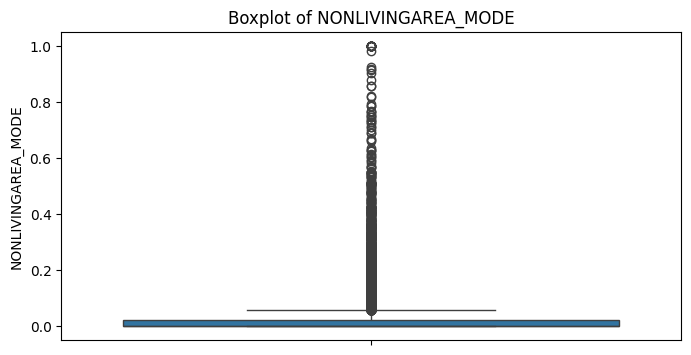

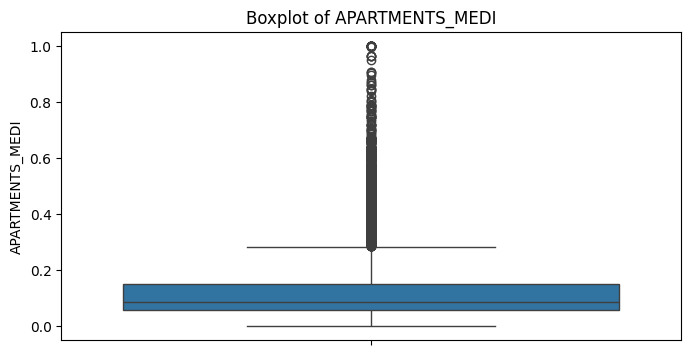

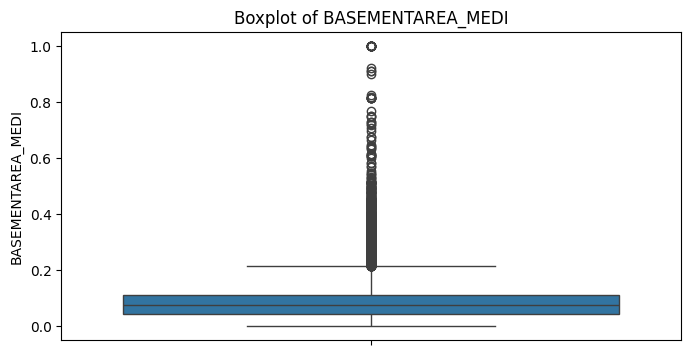

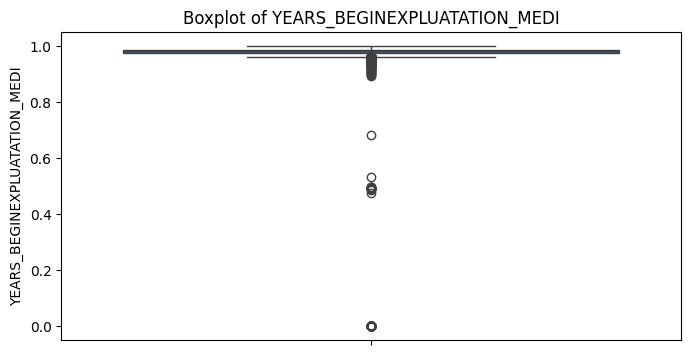

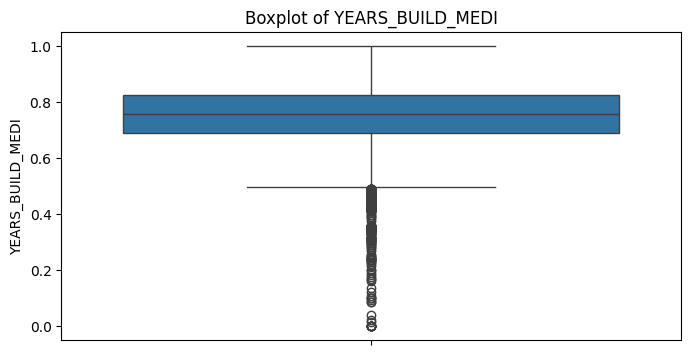

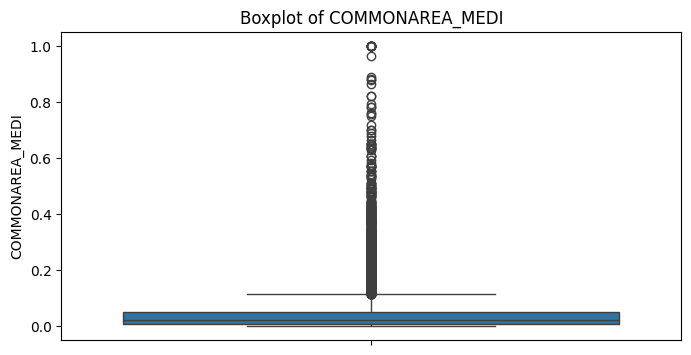

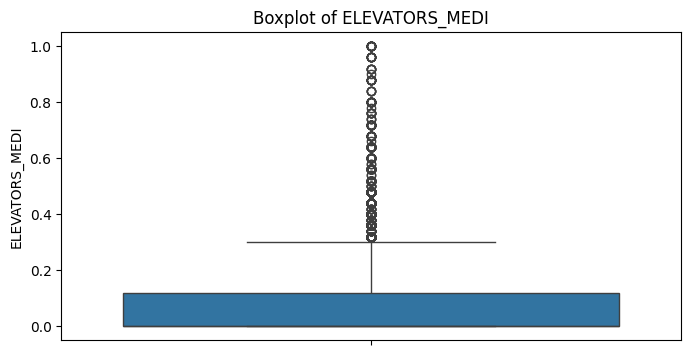

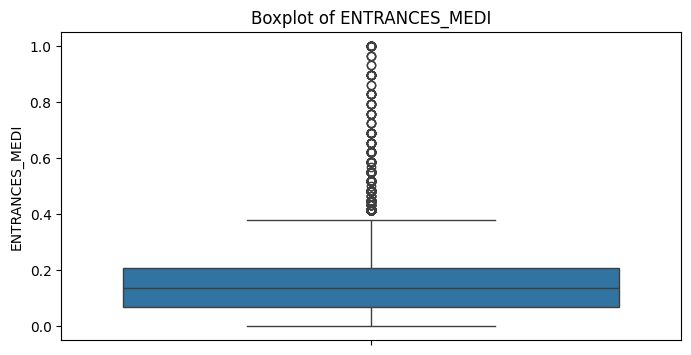

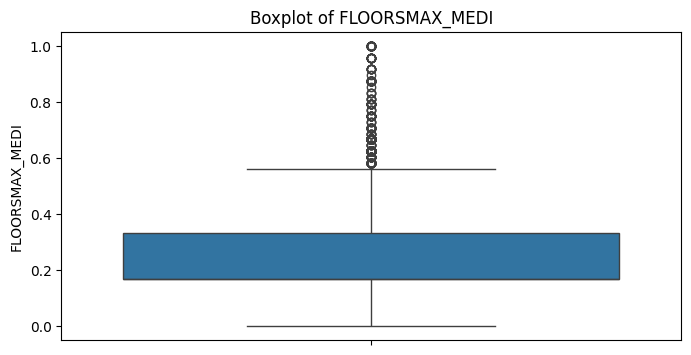

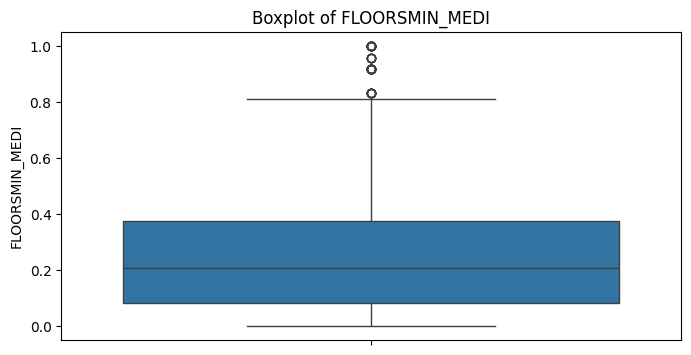

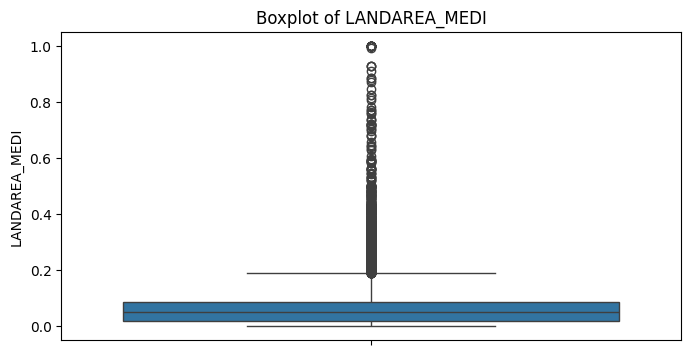

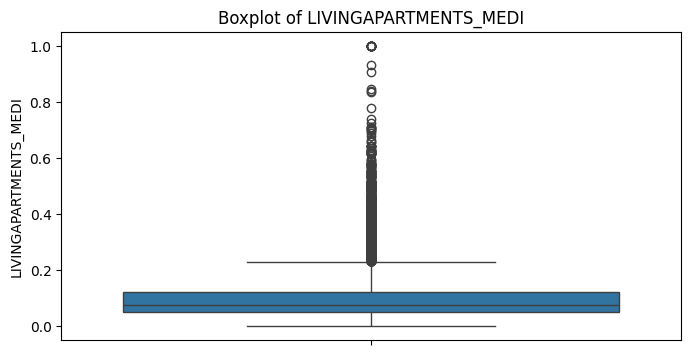

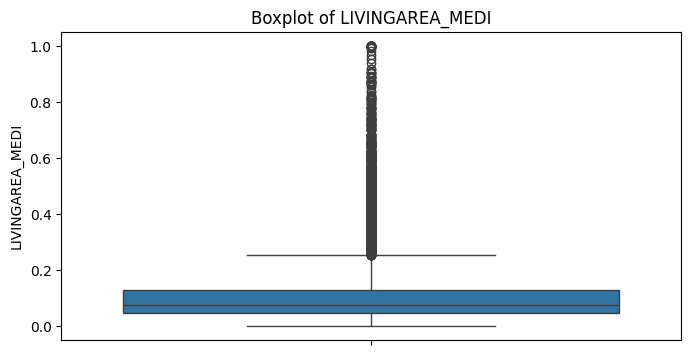

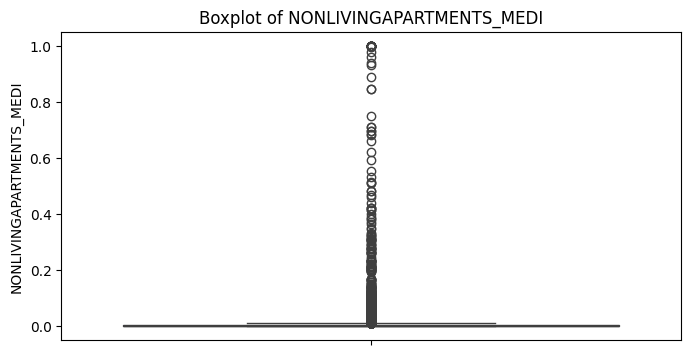

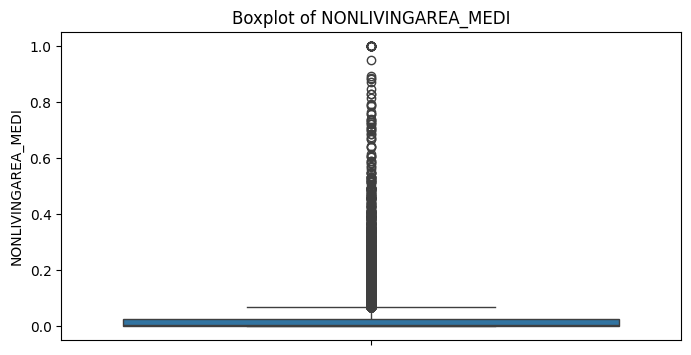

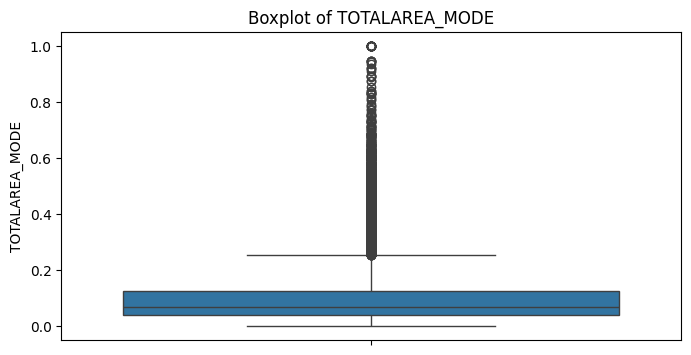

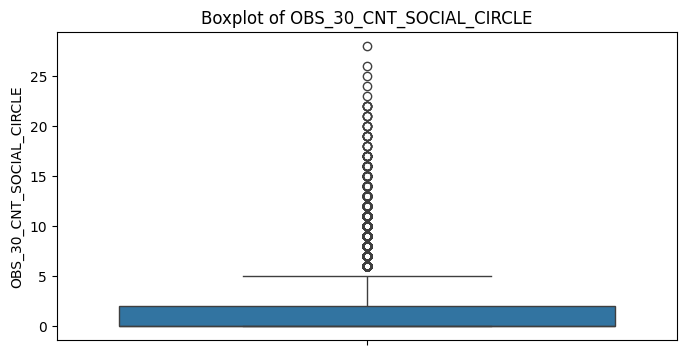

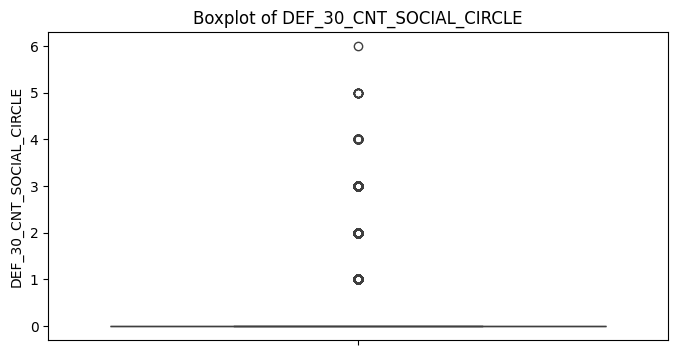

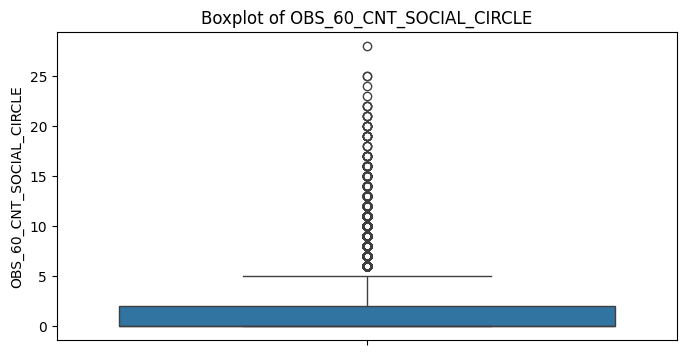

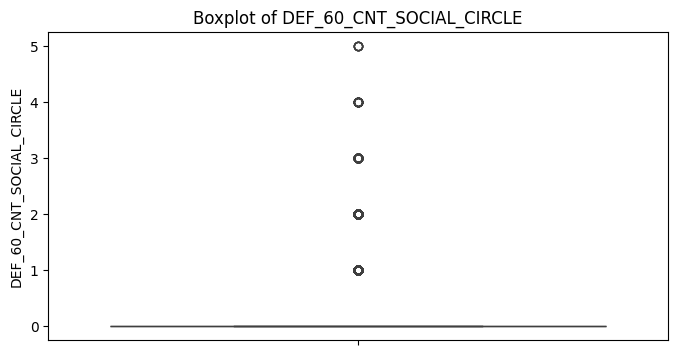

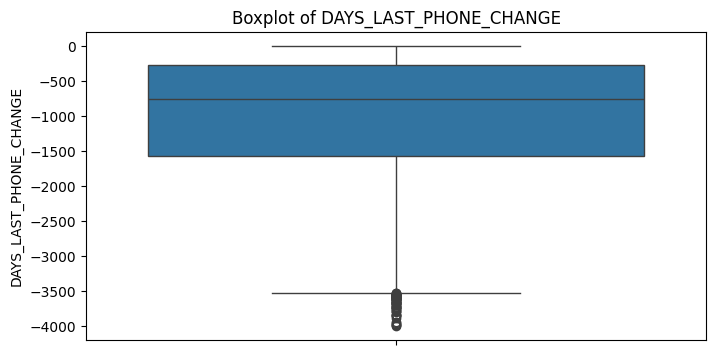

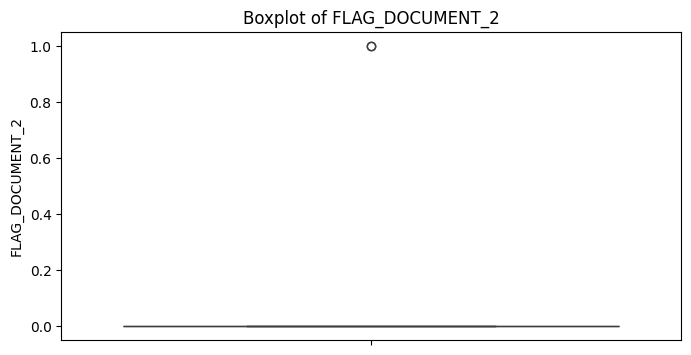

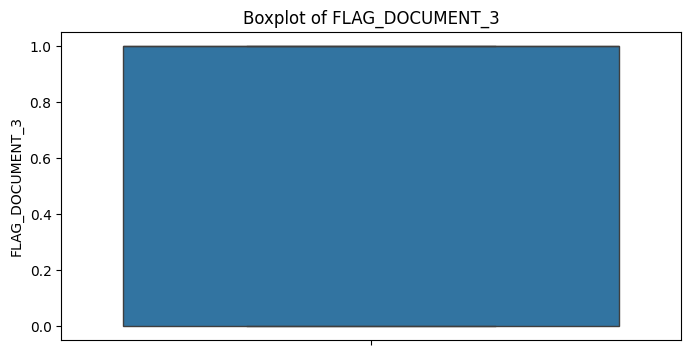

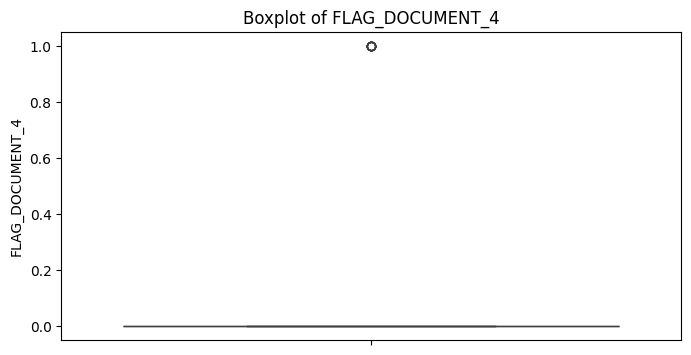

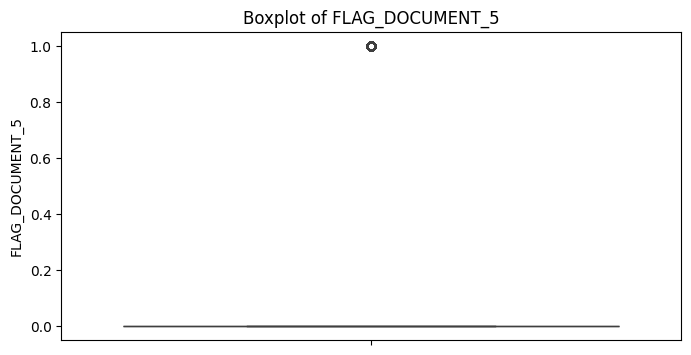

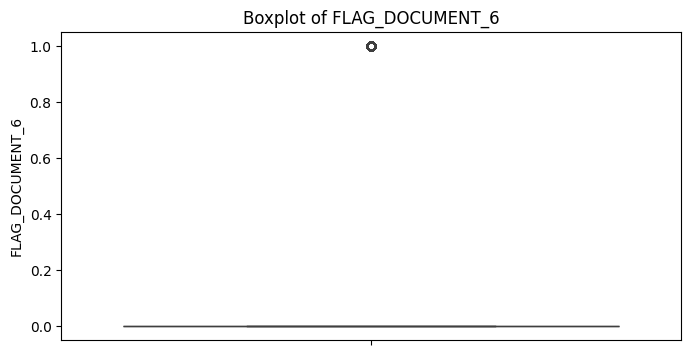

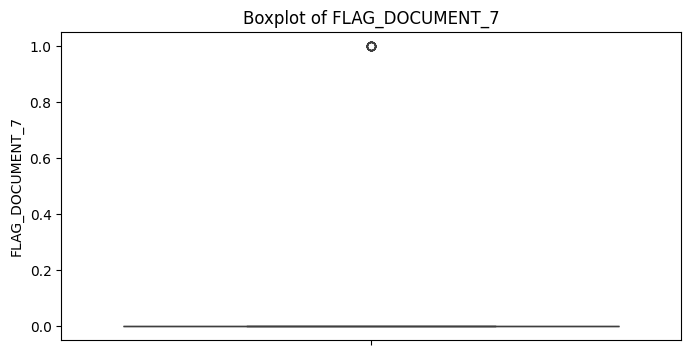

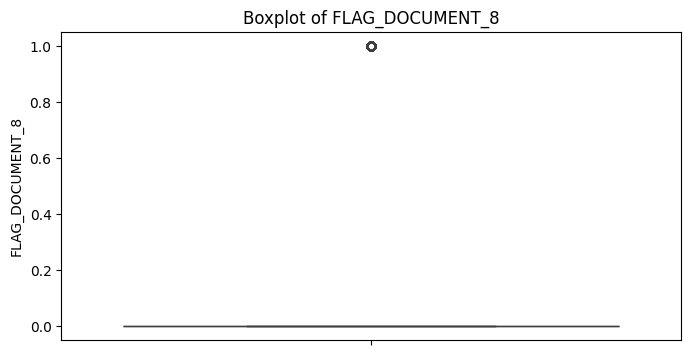

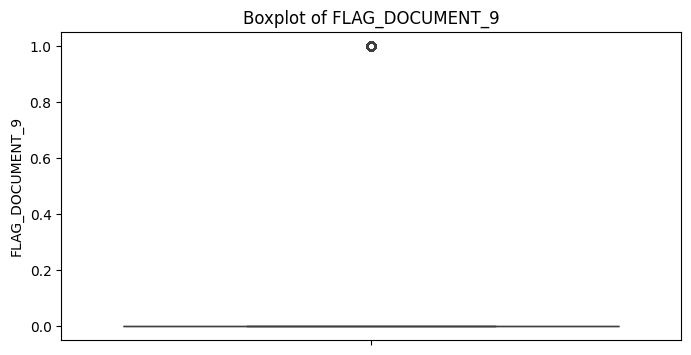

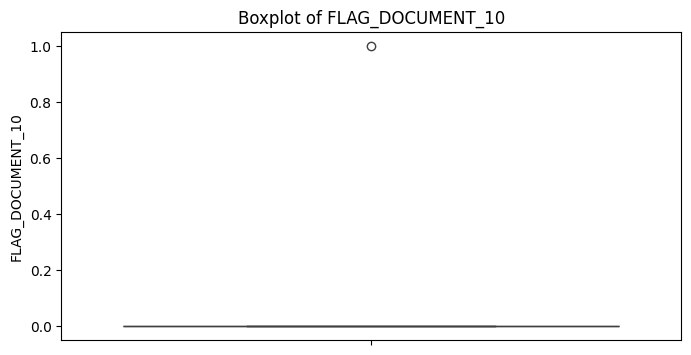

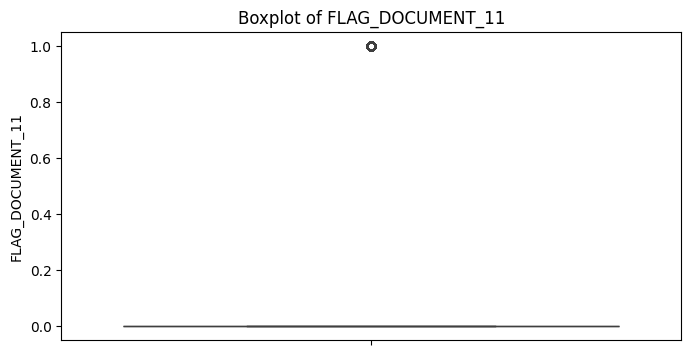

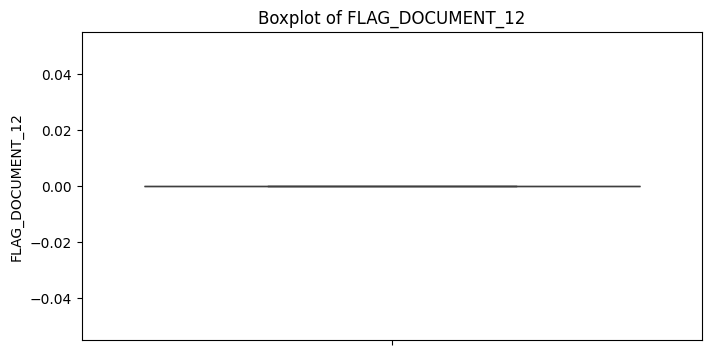

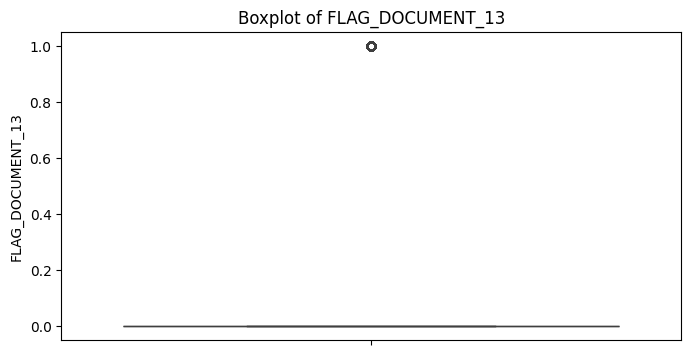

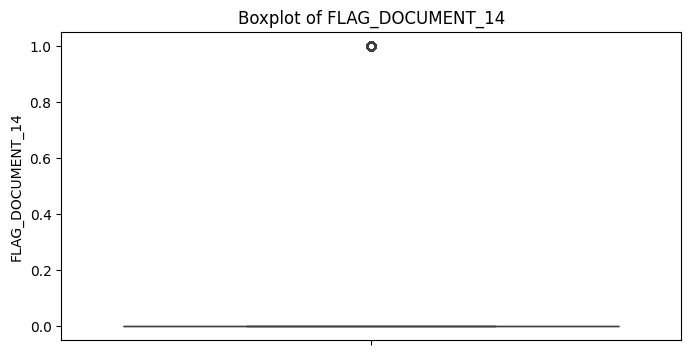

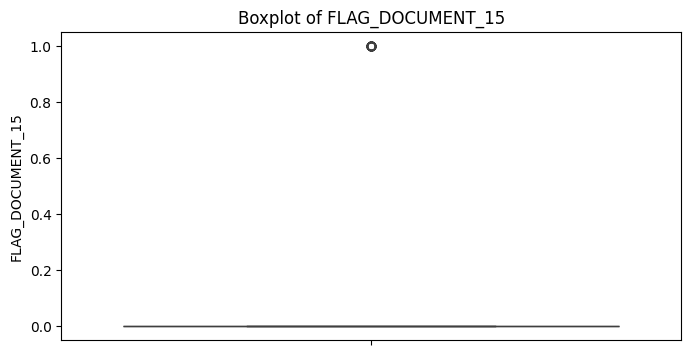

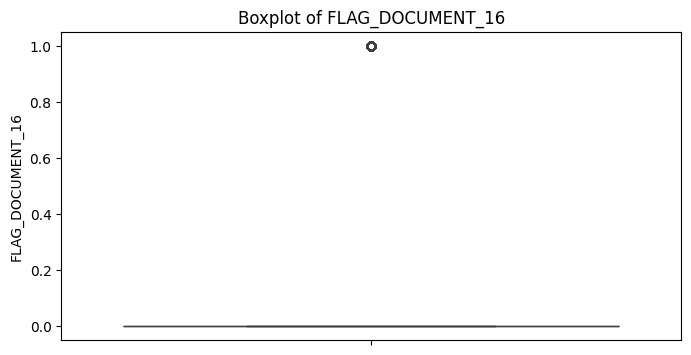

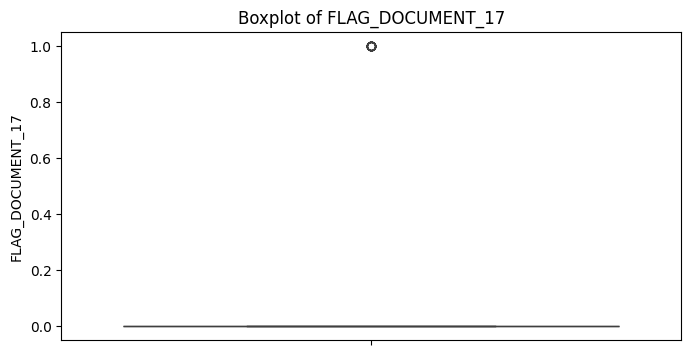

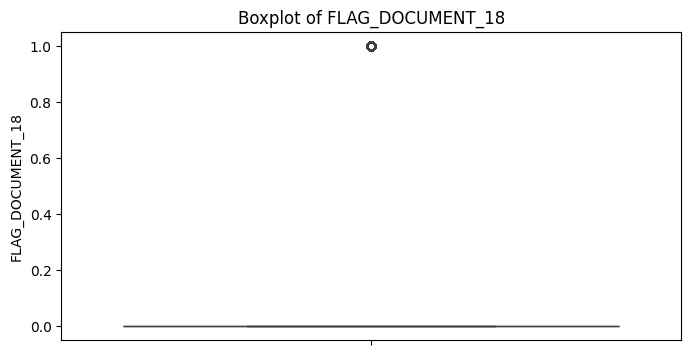

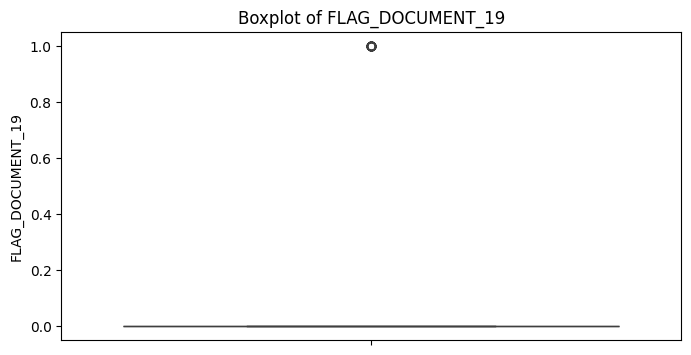

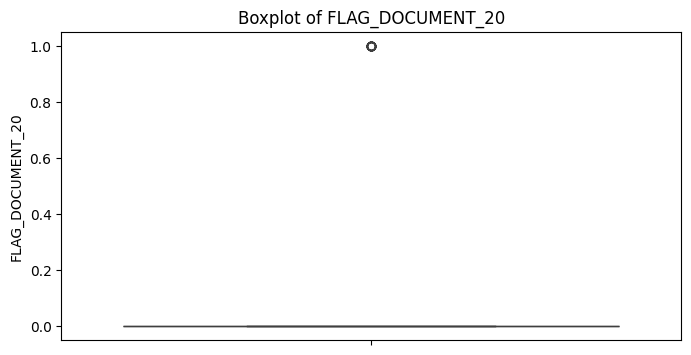

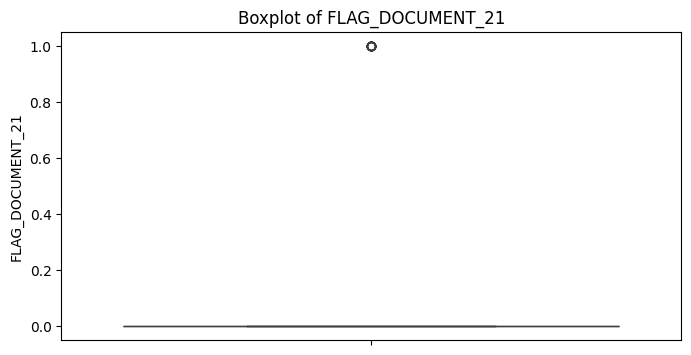

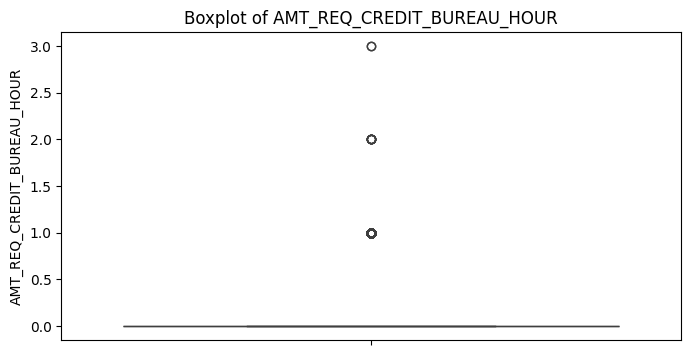

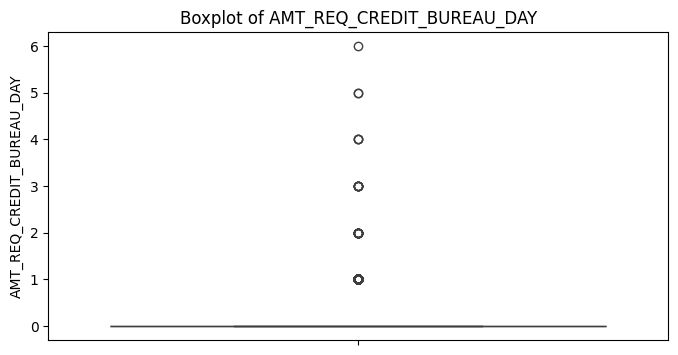

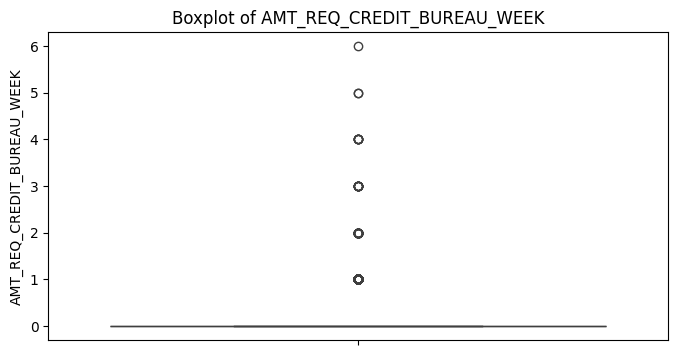

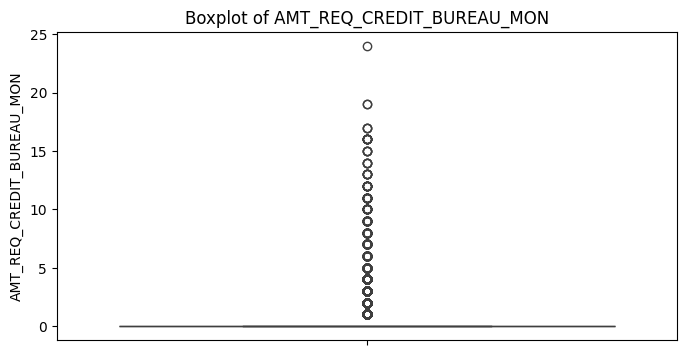

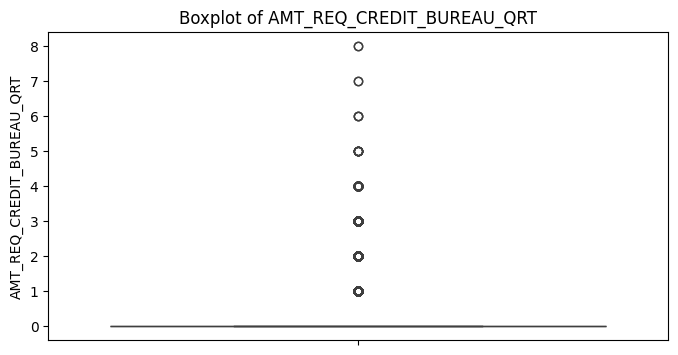

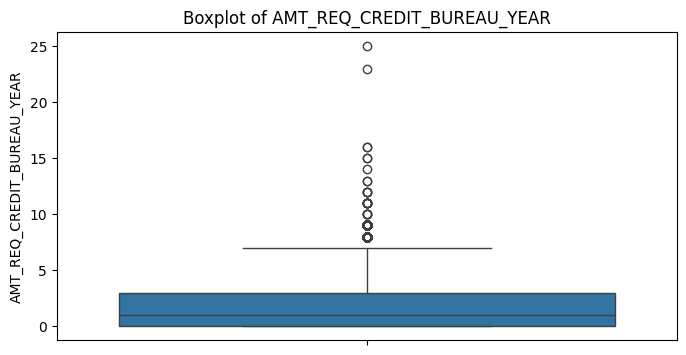

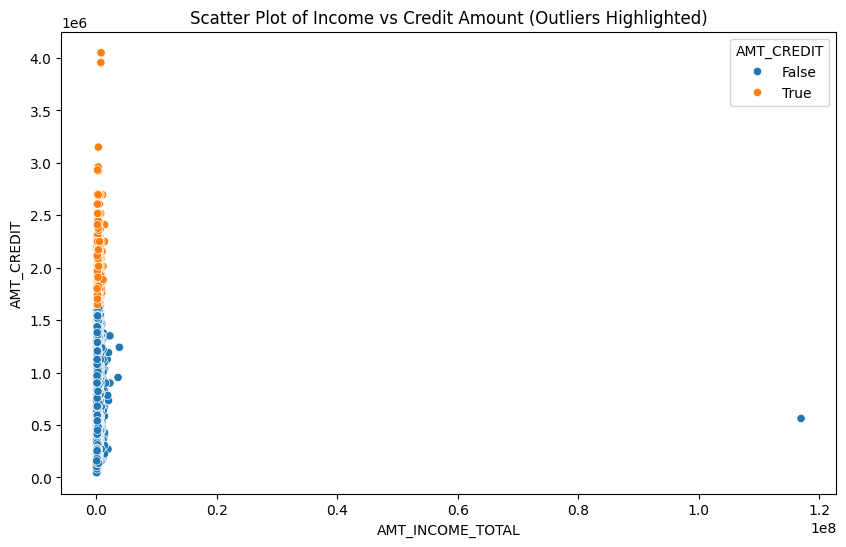

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


application_data = pd.read_csv('./application_data.csv')


numeric_columns = application_data.select_dtypes(include=['float64', 'int64']).columns


Q1 = application_data[numeric_columns].quantile(0.25)  # 25th percentile
Q3 = application_data[numeric_columns].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((application_data[numeric_columns] < lower_bound) | (application_data[numeric_columns] > upper_bound))


outlier_percentage = (outliers.sum() / len(application_data)) * 100
print("Percentage of outliers in each numerical column:\n", outlier_percentage)


for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=application_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=application_data, hue=outliers['AMT_CREDIT'])
plt.title('Scatter Plot of Income vs Credit Amount (Outliers Highlighted)')
plt.show()


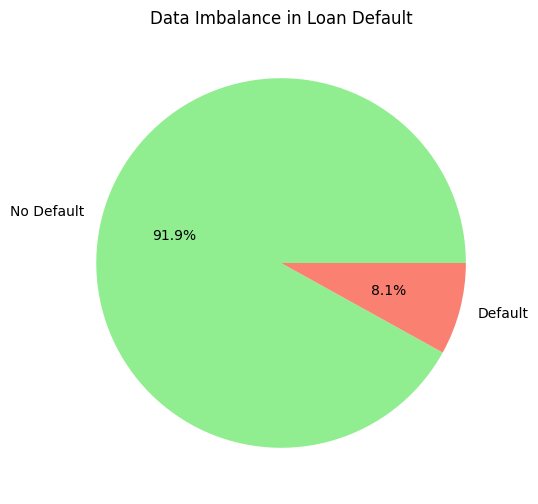

In [4]:
# Task C1: Check data imbalance
target_count = application_data['TARGET'].value_counts()

# Task C2: Visualize data imbalance
plt.figure(figsize=(6, 6))
target_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'], labels=['No Default', 'Default'])
plt.title('Data Imbalance in Loan Default')
plt.ylabel('')
plt.show()


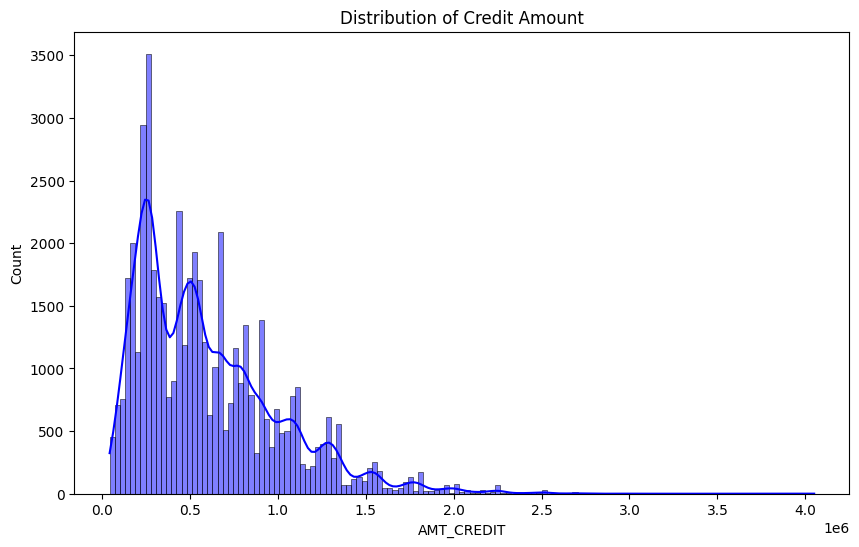

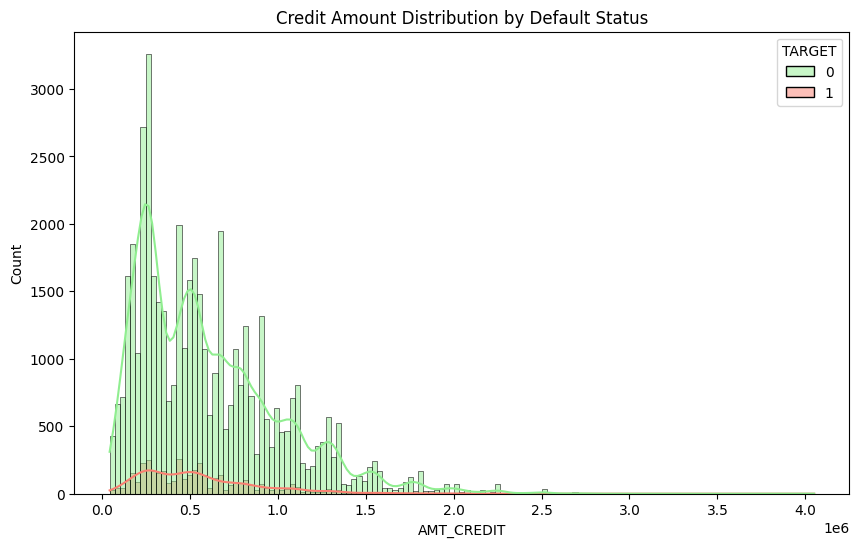

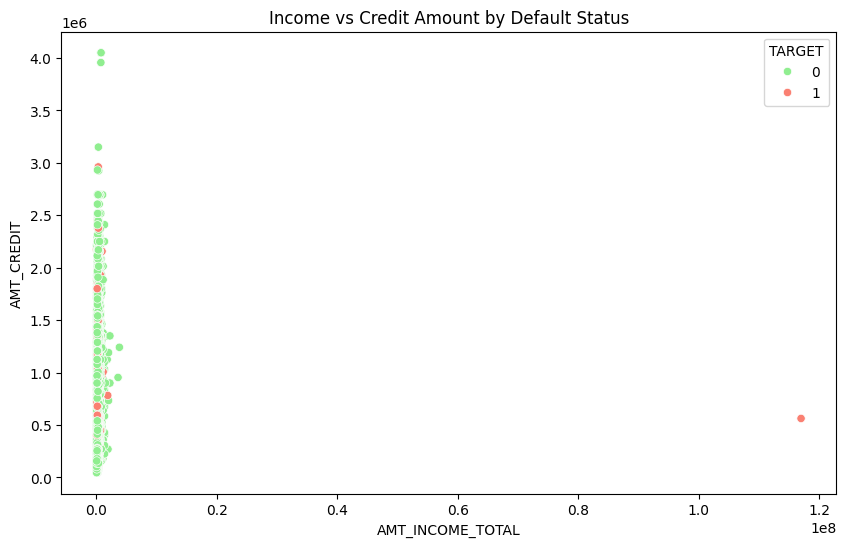

In [5]:
# Task D1: Univariate analysis (distribution of a single variable)
plt.figure(figsize=(10, 6))
sns.histplot(application_data['AMT_CREDIT'], kde=True, color='blue')
plt.title('Distribution of Credit Amount')
plt.show()

# Task D2: Segmented univariate analysis (Credit amount for Default vs No Default)
plt.figure(figsize=(10, 6))
sns.histplot(data=application_data, x='AMT_CREDIT', hue='TARGET', kde=True, palette=['lightgreen', 'salmon'])
plt.title('Credit Amount Distribution by Default Status')
plt.show()

# Task D3: Bivariate analysis (Correlation between income and credit amount)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=application_data, palette=['lightgreen', 'salmon'])
plt.title('Income vs Credit Amount by Default Status')
plt.show()


In [6]:
# this is second part of code

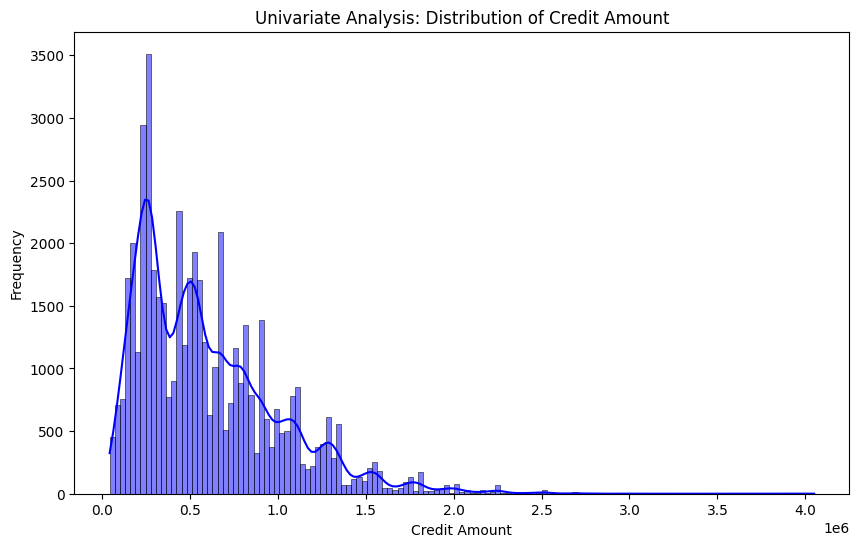

Summary statistics for AMT_CREDIT:
 count    4.999900e+04
mean     5.997006e+05
std      4.024154e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Example with 'AMT_CREDIT'
plt.figure(figsize=(10, 6))
sns.histplot(application_data['AMT_CREDIT'], kde=True, color='blue')
plt.title('Univariate Analysis: Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics for 'AMT_CREDIT'
summary_stats = application_data['AMT_CREDIT'].describe()
print("Summary statistics for AMT_CREDIT:\n", summary_stats)


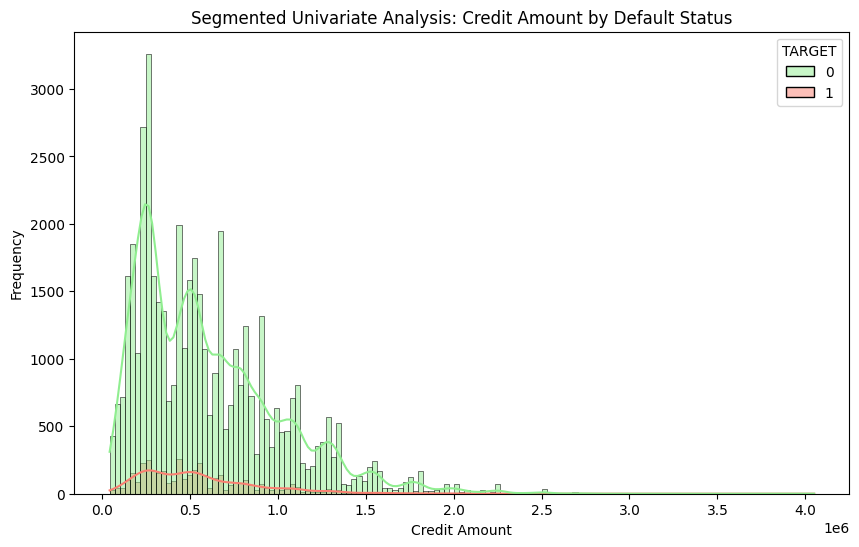

Summary statistics for AMT_CREDIT (Defaulters):
 count    4.026000e+03
mean     5.556035e+05
std      3.404334e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.380079e+05
max      2.961000e+06
Name: AMT_CREDIT, dtype: float64
Summary statistics for AMT_CREDIT (Non-Defaulters):
 count    4.597300e+04
mean     6.035623e+05
std      4.071704e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.184630e+05
75%      8.140410e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [8]:
# Segmented Univariate Analysis: Compare 'AMT_CREDIT' for default and non-default cases
plt.figure(figsize=(10, 6))
sns.histplot(data=application_data, x='AMT_CREDIT', hue='TARGET', kde=True, palette=['lightgreen', 'salmon'])
plt.title('Segmented Univariate Analysis: Credit Amount by Default Status')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

# Summary statistics segmented by 'TARGET'
summary_stats_default = application_data[application_data['TARGET'] == 1]['AMT_CREDIT'].describe()
summary_stats_non_default = application_data[application_data['TARGET'] == 0]['AMT_CREDIT'].describe()

print("Summary statistics for AMT_CREDIT (Defaulters):\n", summary_stats_default)
print("Summary statistics for AMT_CREDIT (Non-Defaulters):\n", summary_stats_non_default)


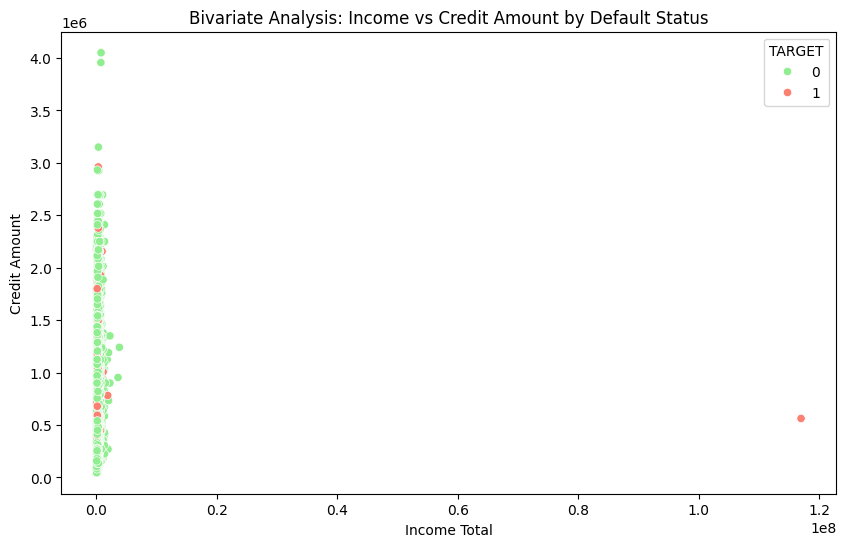

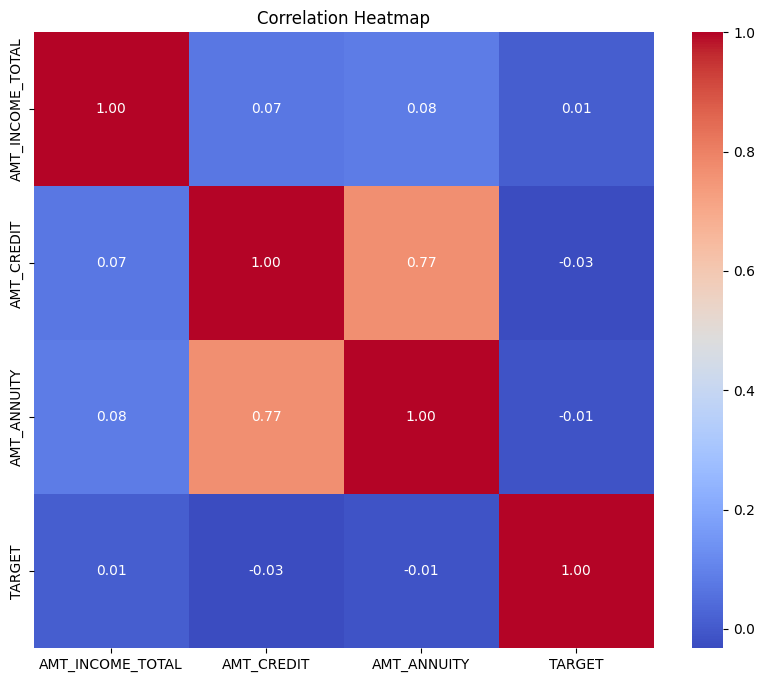

In [9]:
# Bivariate Analysis: Scatter plot between 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=application_data, palette=['lightgreen', 'salmon'])
plt.title('Bivariate Analysis: Income vs Credit Amount by Default Status')
plt.xlabel('Income Total')
plt.ylabel('Credit Amount')
plt.show()

# Correlation heatmap between key variables and 'TARGET'
plt.figure(figsize=(10, 8))
correlation_matrix = application_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'TARGET']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


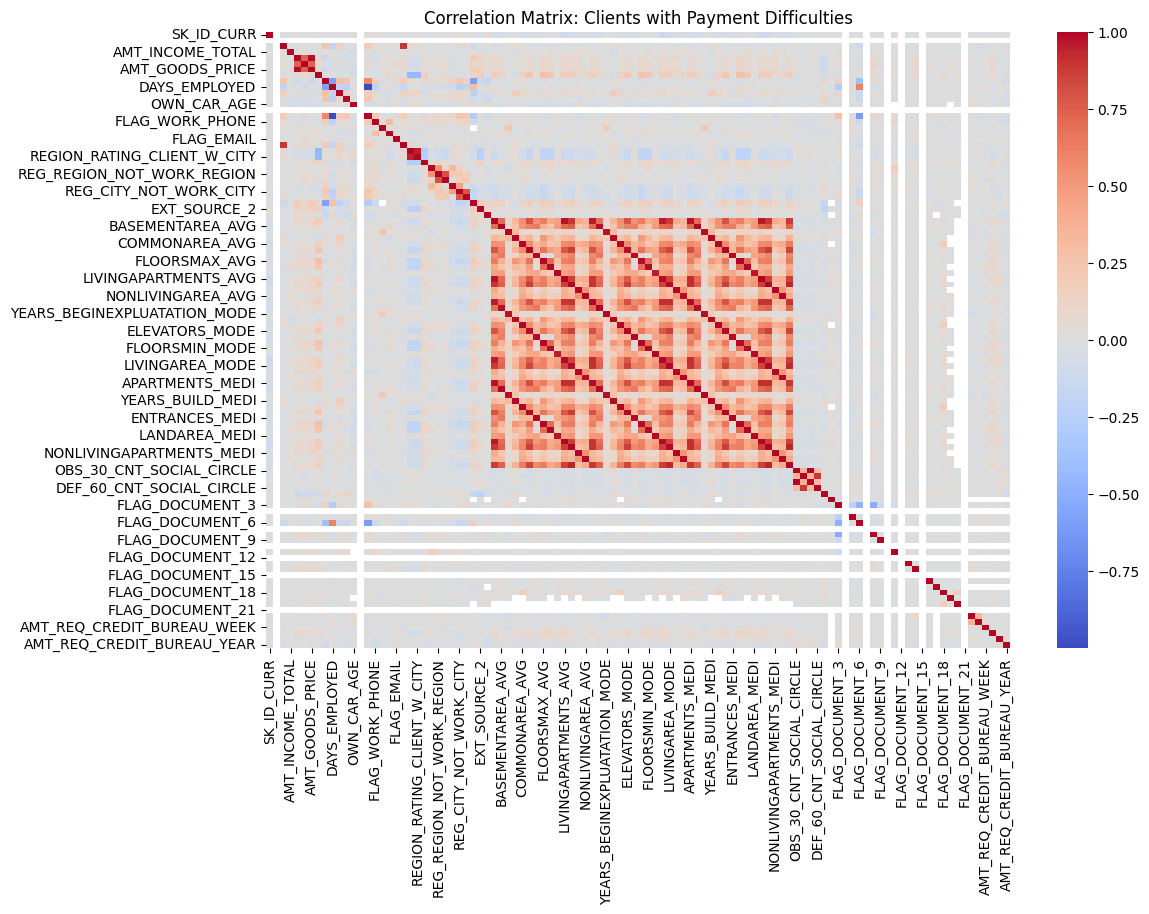

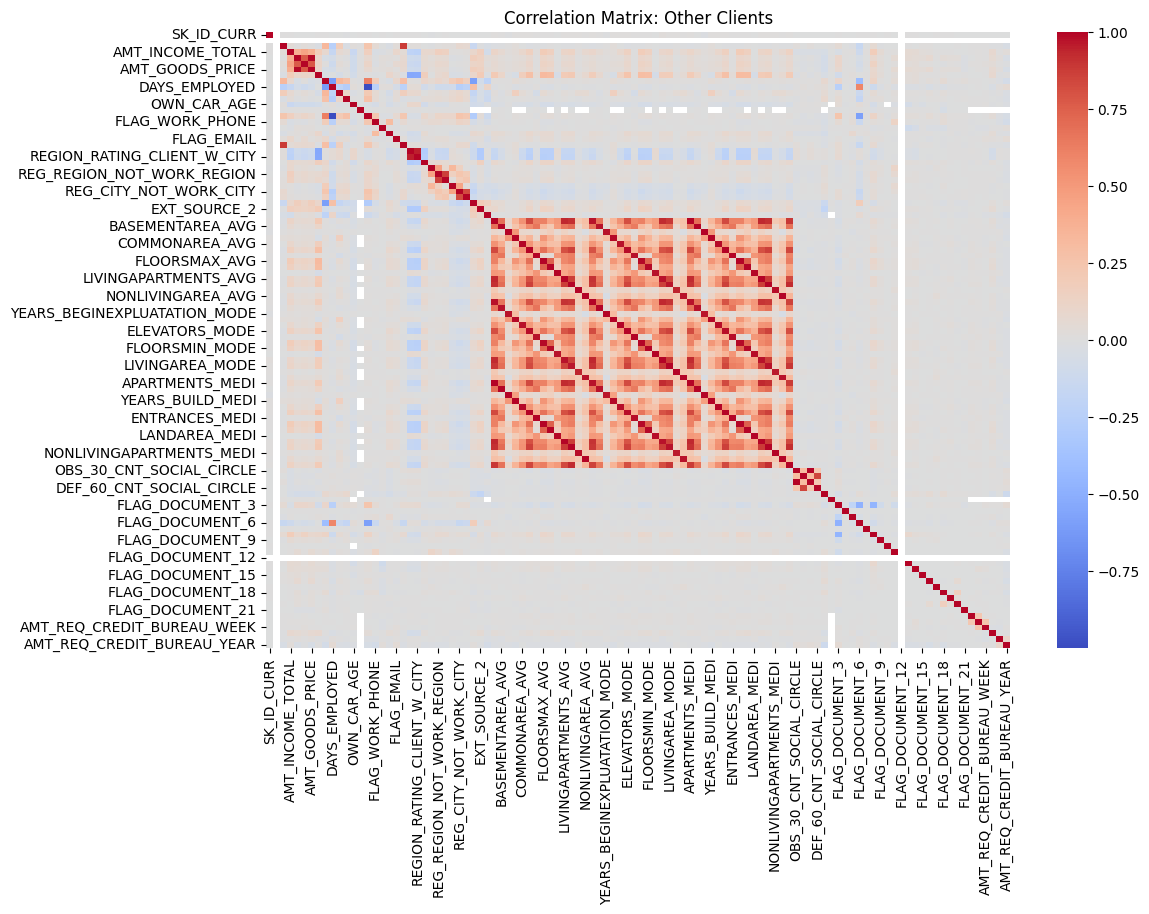

Top correlations with TARGET for clients with payment difficulties:
 SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
Name: TARGET, dtype: float64

Top correlations with TARGET for other clients:
 SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
Name: TARGET, dtype: float64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming it's already loaded in your environment)
application_data = pd.read_csv('./application_data.csv')

# Step 1: Segment the dataset
# Segment 1: Clients with payment difficulties (TARGET = 1)
clients_with_difficulties = application_data[application_data['TARGET'] == 1]

# Segment 2: All other cases (TARGET = 0)
other_clients = application_data[application_data['TARGET'] == 0]

# Step 2: Compute correlations for each segment
# Focusing on numerical columns for correlation
numeric_columns = application_data.select_dtypes(include=['float64', 'int64']).columns

# Correlations for clients with payment difficulties
corr_difficulties = clients_with_difficulties[numeric_columns].corr()

# Correlations for other clients
corr_other_clients = other_clients[numeric_columns].corr()

# Step 3: Visualize the correlation matrices with heatmaps
# Correlation Heatmap for clients with payment difficulties
plt.figure(figsize=(12, 8))
sns.heatmap(corr_difficulties, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix: Clients with Payment Difficulties')
plt.show()

# Correlation Heatmap for other clients
plt.figure(figsize=(12, 8))
sns.heatmap(corr_other_clients, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix: Other Clients')
plt.show()

# Step 4: Identify the top correlations with the 'TARGET' variable
top_corr_difficulties = corr_difficulties['TARGET'].sort_values(ascending=False).head(10)
top_corr_other_clients = corr_other_clients['TARGET'].sort_values(ascending=False).head(10)

# Display top correlations
print("Top correlations with TARGET for clients with payment difficulties:\n", top_corr_difficulties)
print("\nTop correlations with TARGET for other clients:\n", top_corr_other_clients)


In [11]:
# Segment the data
clients_with_difficulties = application_data[application_data['TARGET'] == 1]
clients_without_difficulties = application_data[application_data['TARGET'] == 0]


In [12]:
# Step 1: Select numerical columns
numeric_columns = application_data.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate correlations for clients with payment difficulties (TARGET = 1)
correlations_with_difficulties = clients_with_difficulties[numeric_columns].corr()

# Step 3: Calculate correlations for clients without payment difficulties (TARGET = 0)
correlations_without_difficulties = clients_without_difficulties[numeric_columns].corr()


In [13]:
# Rank top correlations for clients with difficulties
top_correlations_with_difficulties = correlations_with_difficulties['TARGET'].abs().sort_values(ascending=False).head(10)
print("Top correlations for clients with payment difficulties:\n", top_correlations_with_difficulties)

# Rank top correlations for clients without difficulties
top_correlations_without_difficulties = correlations_without_difficulties['TARGET'].abs().sort_values(ascending=False).head(10)
print("Top correlations for clients without payment difficulties:\n", top_correlations_without_difficulties)


Top correlations for clients with payment difficulties:
 SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
Name: TARGET, dtype: float64
Top correlations for clients without payment difficulties:
 SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
Name: TARGET, dtype: float64


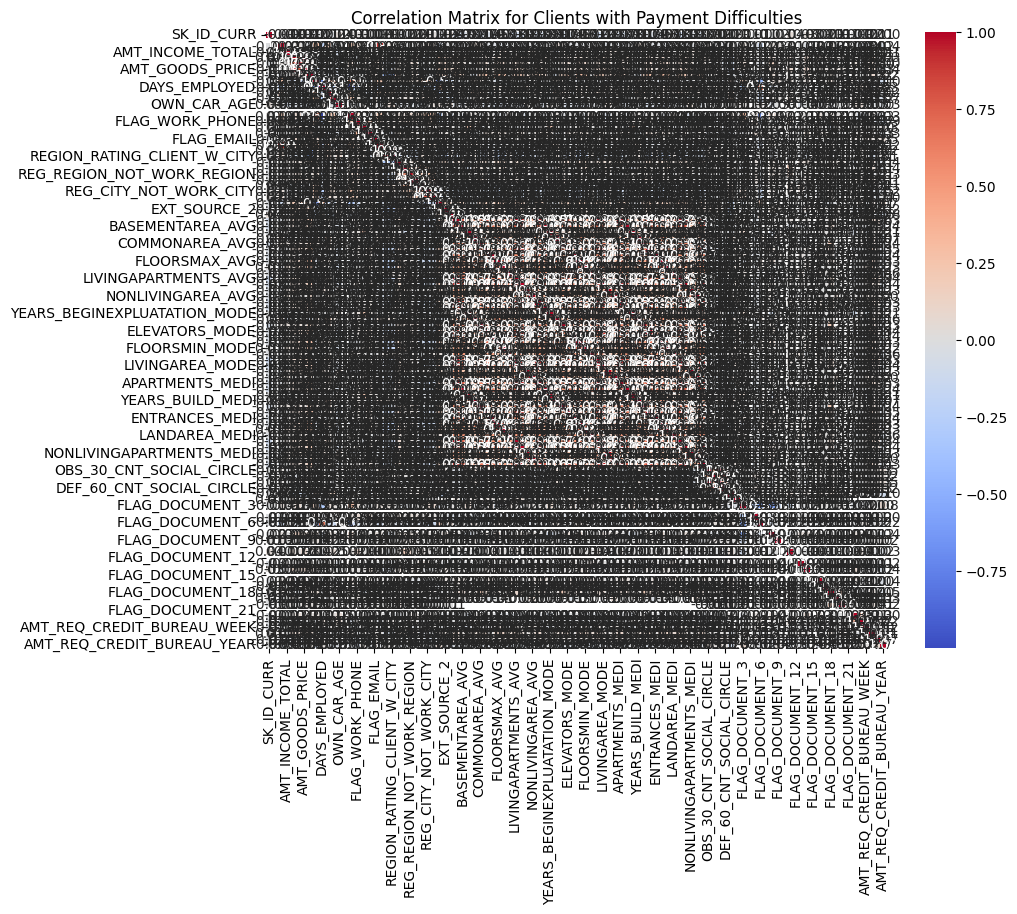

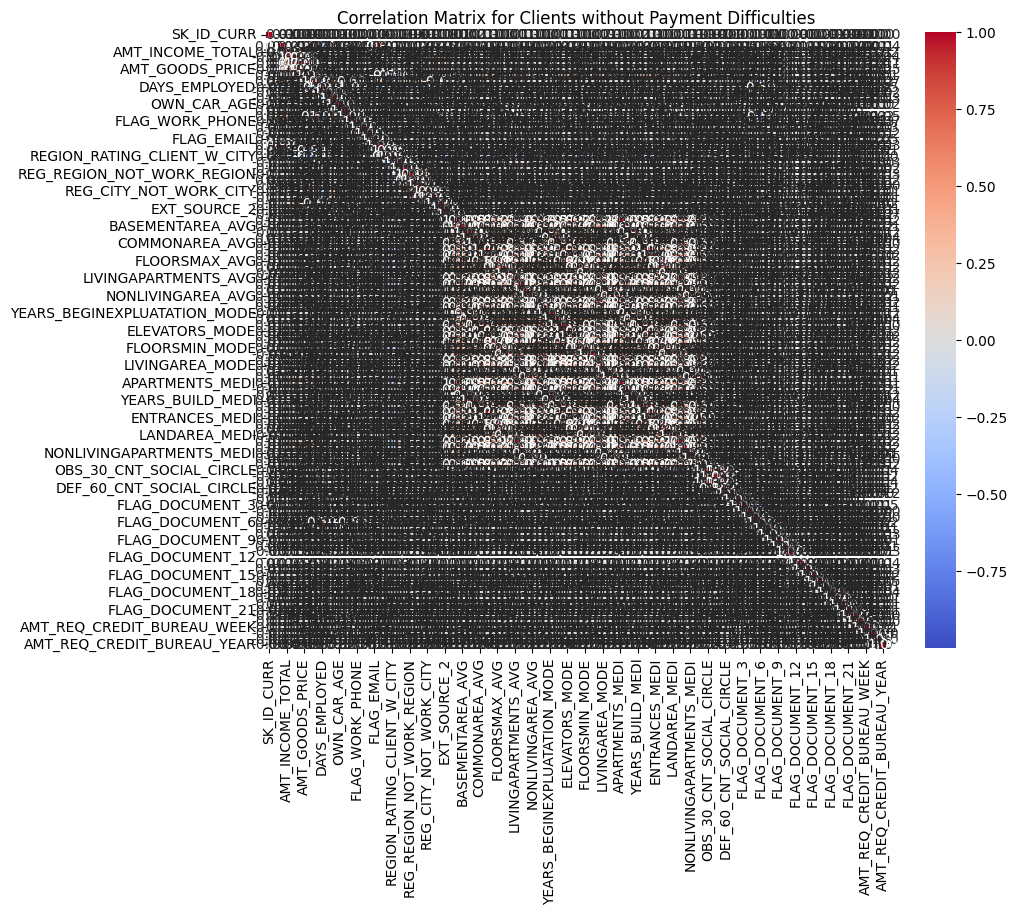

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlations for clients with payment difficulties
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_difficulties, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Clients with Payment Difficulties')
plt.show()

# Visualize correlations for clients without payment difficulties
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_without_difficulties, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Clients without Payment Difficulties')
plt.show()


In [ ]:
# Focus heatmap on top correlations for clients with payment difficulties
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_with_difficulties.loc[top_correlations_with_difficulties.index, top_correlations_with_difficulties.index], 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlations for Clients with Payment Difficulties')
plt.show()

# Focus heatmap on top correlations for clients without payment difficulties
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_without_difficulties.loc[top_correlations_without_difficulties.index, 
            top_correlations_without_difficulties.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlations for Clients without Payment Difficulties')
plt.show()

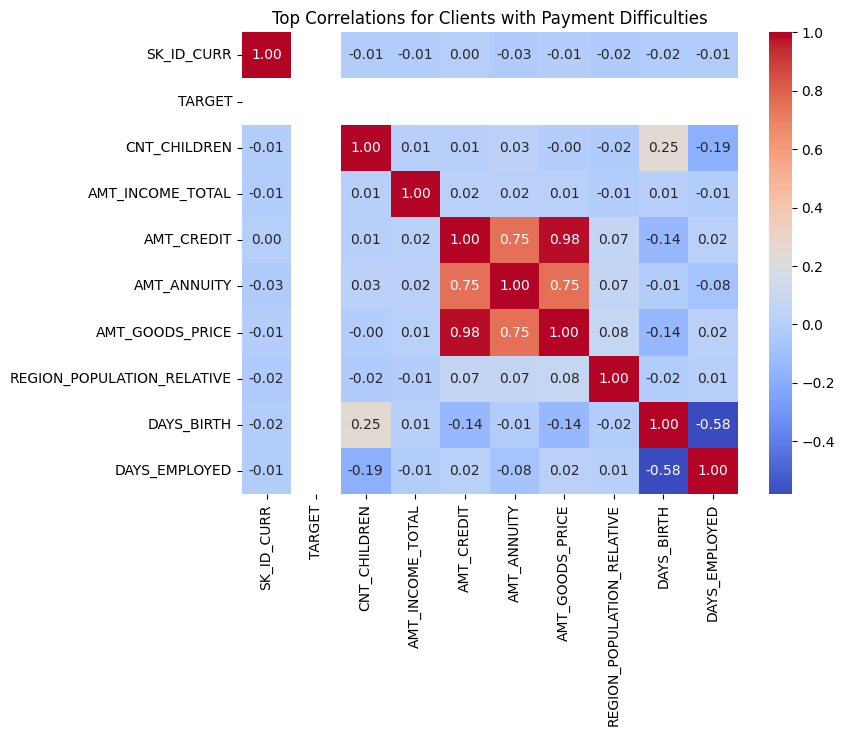

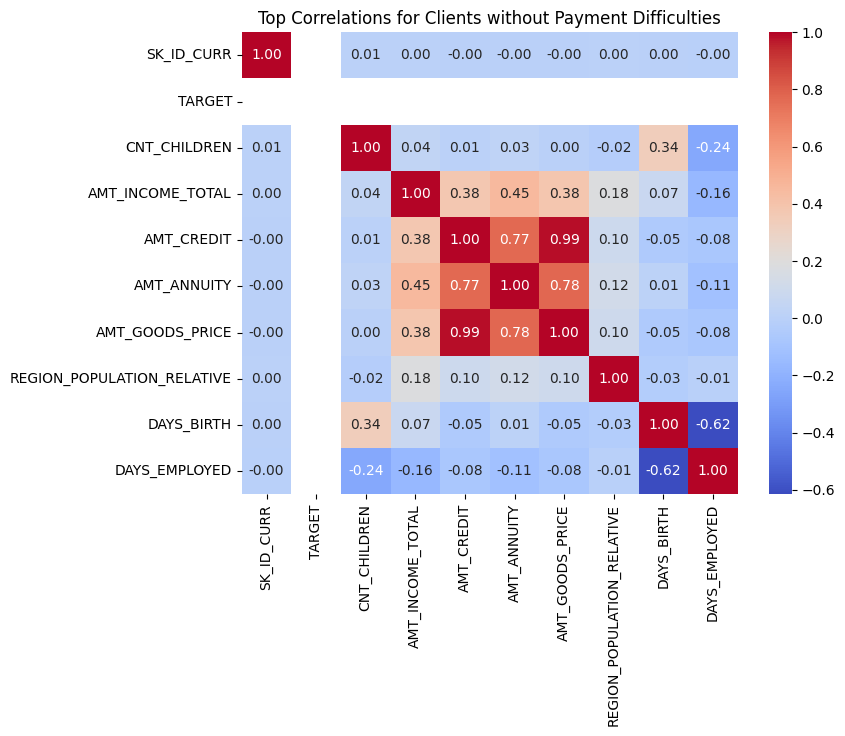

Top correlations with TARGET for clients with payment difficulties:
 SK_ID_CURR                   NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
DAYS_REGISTRATION            NaN
Name: TARGET, dtype: float64

Top correlations with TARGET for other clients:
 SK_ID_CURR                   NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
DAYS_REGISTRATION            NaN
Name: TARGET, dtype: float64


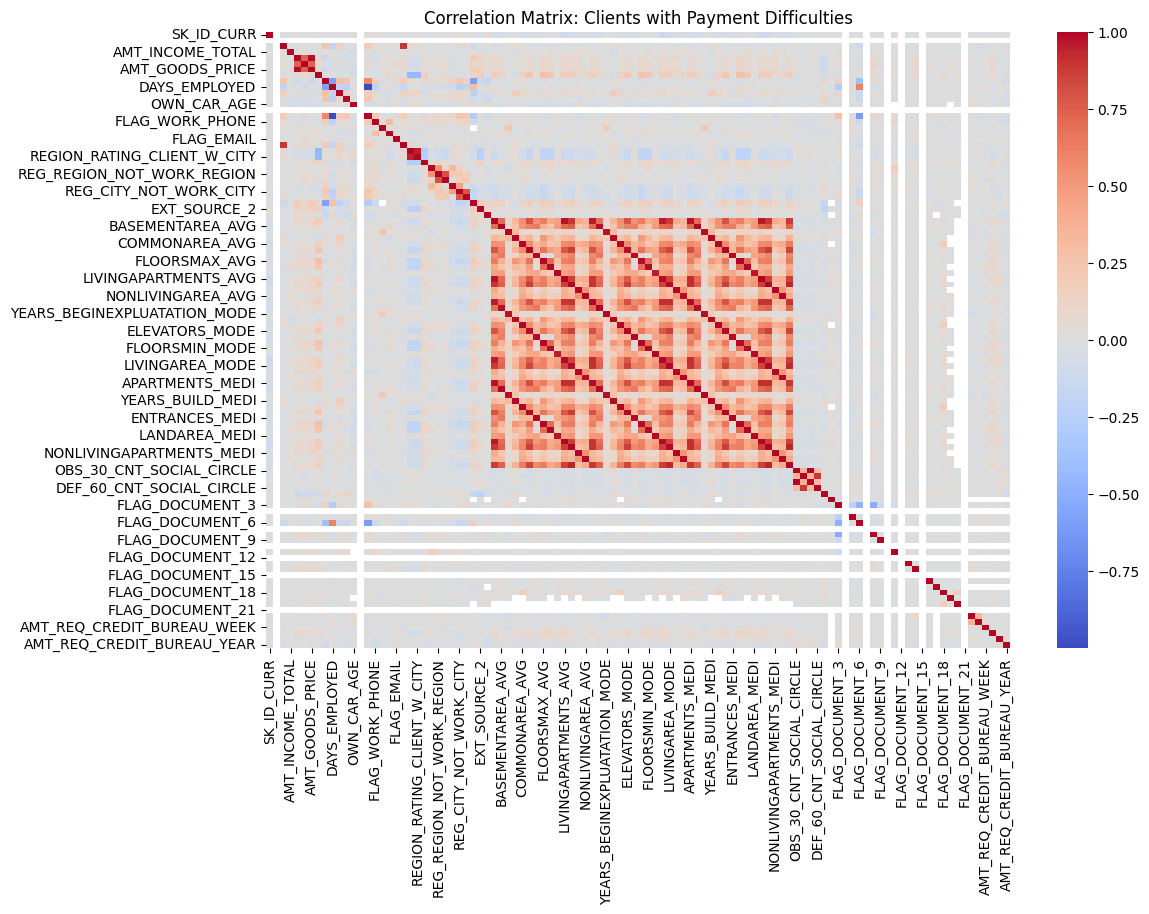

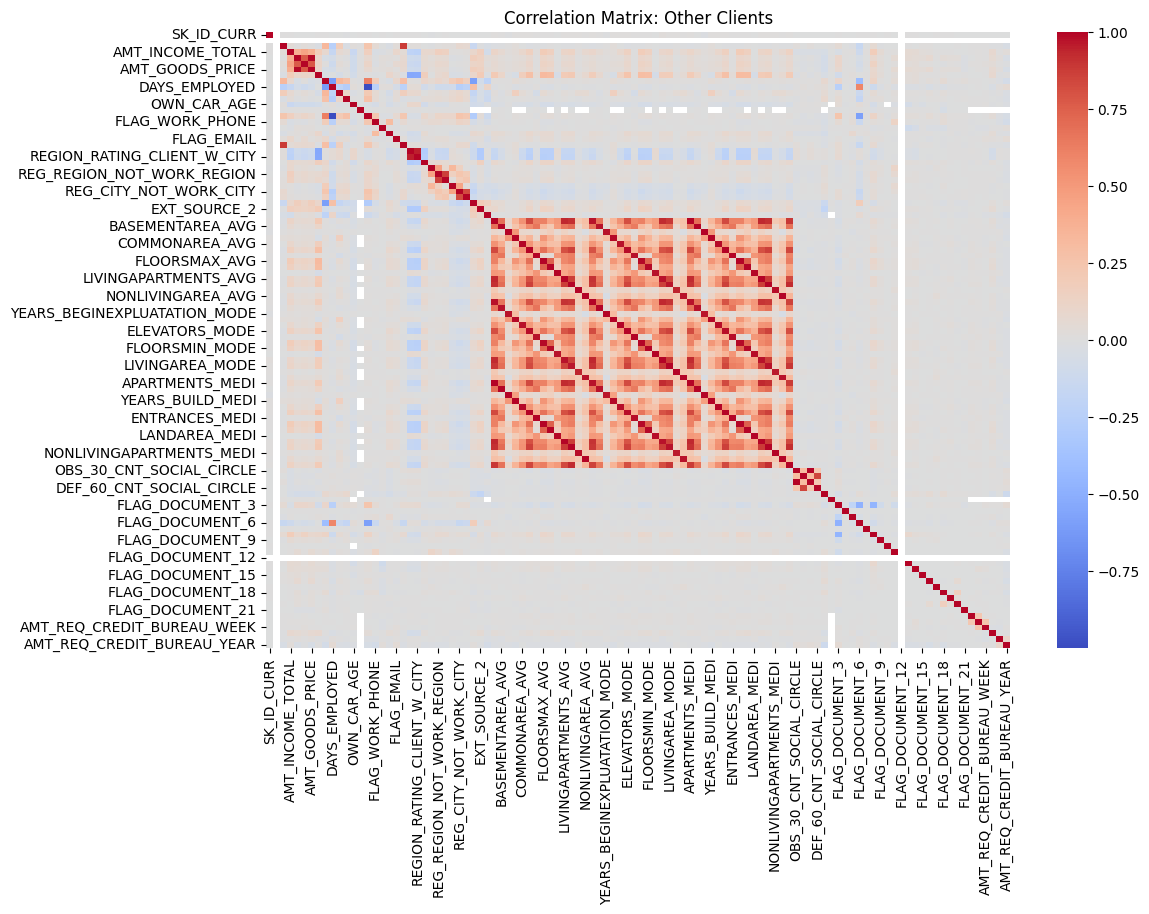

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming it's already loaded in your environment)
application_data = pd.read_csv('./application_data.csv')

# Step 1: Segment the dataset based on TARGET
# Segment 1: Clients with payment difficulties (TARGET = 1)
clients_with_difficulties = application_data[application_data['TARGET'] == 1]

# Segment 2: All other clients (TARGET = 0)
other_clients = application_data[application_data['TARGET'] == 0]

# Step 2: Compute correlations for each segment
# We only compute correlations for numeric columns
numeric_columns = application_data.select_dtypes(include=['float64', 'int64']).columns

# Correlations for clients with payment difficulties
corr_difficulties = clients_with_difficulties[numeric_columns].corr()

# Correlations for other clients
corr_other_clients = other_clients[numeric_columns].corr()

# Step 3: Identify the top correlations for each segment
# Extract top 10 correlations with the 'TARGET' variable for clients with difficulties
top_corr_difficulties = corr_difficulties['TARGET'].sort_values(ascending=False).drop('TARGET').head(10)

# Extract top 10 correlations with the 'TARGET' variable for other clients
top_corr_other_clients = corr_other_clients['TARGET'].sort_values(ascending=False).drop('TARGET').head(10)

# Print the top correlations for both segments
print("Top correlations with TARGET for clients with payment difficulties:\n", top_corr_difficulties)
print("\nTop correlations with TARGET for other clients:\n", top_corr_other_clients)

# Step 4: Visualize the correlation matrices with heatmaps

# Heatmap for clients with payment difficulties
plt.figure(figsize=(12, 8))
sns.heatmap(corr_difficulties, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix: Clients with Payment Difficulties')
plt.show()

# Heatmap for other clients
plt.figure(figsize=(12, 8))
sns.heatmap(corr_other_clients, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix: Other Clients')
plt.show()
